<a href="https://colab.research.google.com/github/vzeizer/Statistical_Analysis_LifeExpectancy/blob/master/StatAnalysis_DevelopedCountries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing SHAP for XAI
!pip install shap
# installing joypy for Visualization
!pip install joypy

In [ ]:
# essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joypy
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# plotly for interactive visualizations
import plotly.express as px

# handling OS settings
pd.set_option('display.max_columns',None)
import os

# library for analyzing missing data
import missingno as msno

# ML imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# statistical packages
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

# XAI imports
import shap

In [ ]:
RANDOM_STATE = 88

In [ ]:
# Opening the Data
df = pd.read_csv('Life Expectancy Data.csv')
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Visualizing the columns/features
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Exploratory Data Analysis (EDA)

- Now, it is going to be developed an exploratory data analysis of the dataset concerning the developed countries in the Study.

#### Filtering by Developed Countries and Renaming the Features

In [ ]:
# filtering Status by 'Developing'
df_developed = df[df['Status']=='Developed']

# Dictionary to rename the Features
dict_columns = {'Year':'year', 'Status':'status', 'Life expectancy ':'life_expectancy','Country':'country',
                'Adult Mortality': 'adult_mortality', 'infant deaths':'infant_deaths',
       'Alcohol':'alcohol', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'hepatitis_b',
       'Measles ':'measles', ' BMI ':'bmi','under-five deaths':'under_five_deaths', 'Polio':'polio',
        'Total expenditure':'total_expenditure', 'Diphtheria ':'diphtheria', ' HIV/AIDS':'hiv_aids',
        ' thinness  1-19 years':'thinnes_1_19_years', ' thinness 5-9 years':'thinness_5_9_years',
        'Income composition of resources':'income_composition_resources', 'Schooling':'schooling',
        'GDP':'gdp','Population':'population'}

# renaming the dataframe
df_developed = df_developed.rename(columns=dict_columns)
# dropping the column status, because we are restricting the problems to "Developing" countries
df_developed = df_developed.drop(columns=['status'])

In [ ]:
# checking whether the columns are now OK
df_developed.columns

Index(['country', 'year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five deaths ', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'income_composition_resources', 'schooling'],
      dtype='object')

### Visualizations with JoyPy

- Now, a joypy plot of the 'life_expectancy' and 'schooling' by country is developed.

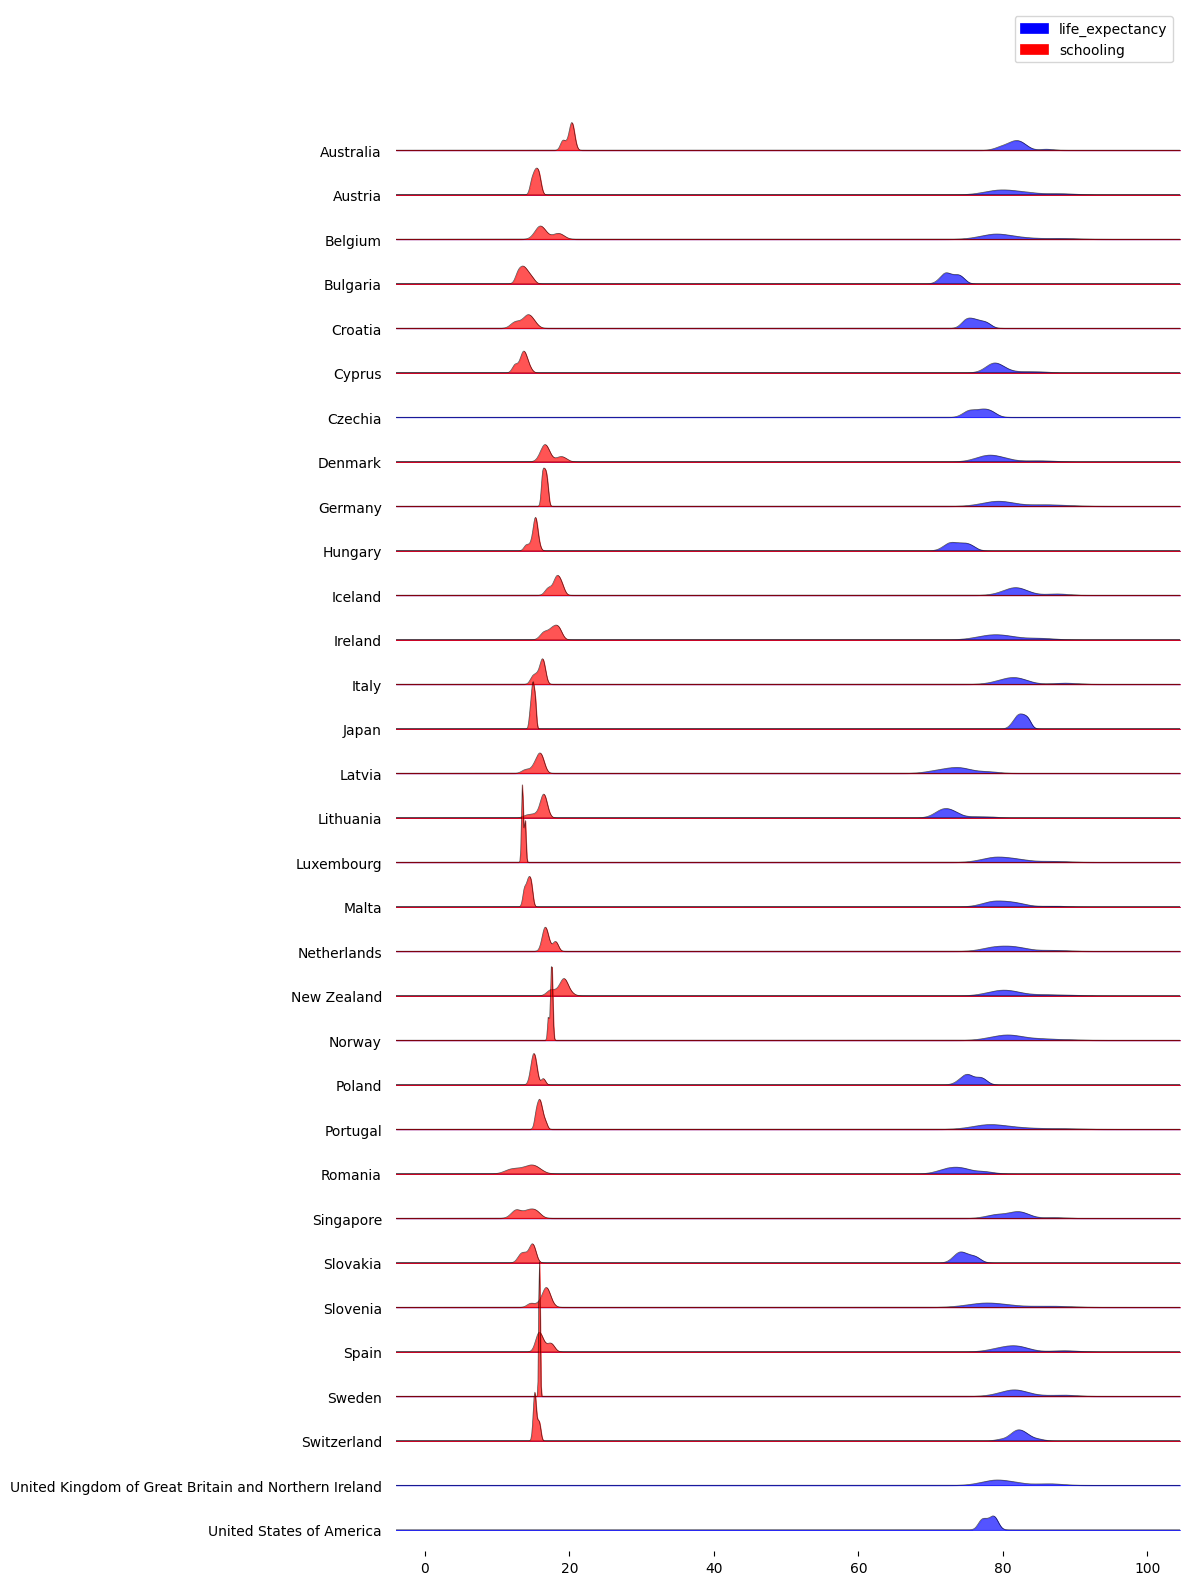

In [ ]:
fig, axes = joypy.joyplot(df_developed, by="country",column=['life_expectancy',  'schooling'],
                    color=[ 'blue', 'red'],
                    alpha=.67,
                    legend=True,
                    overlap=2,
                    linewidth=.5,
                    figsize=(12, 16))


- Now, a joypy plot of the 'polio', 'diphtheria' and 'hepatitis_b' by country is developed.

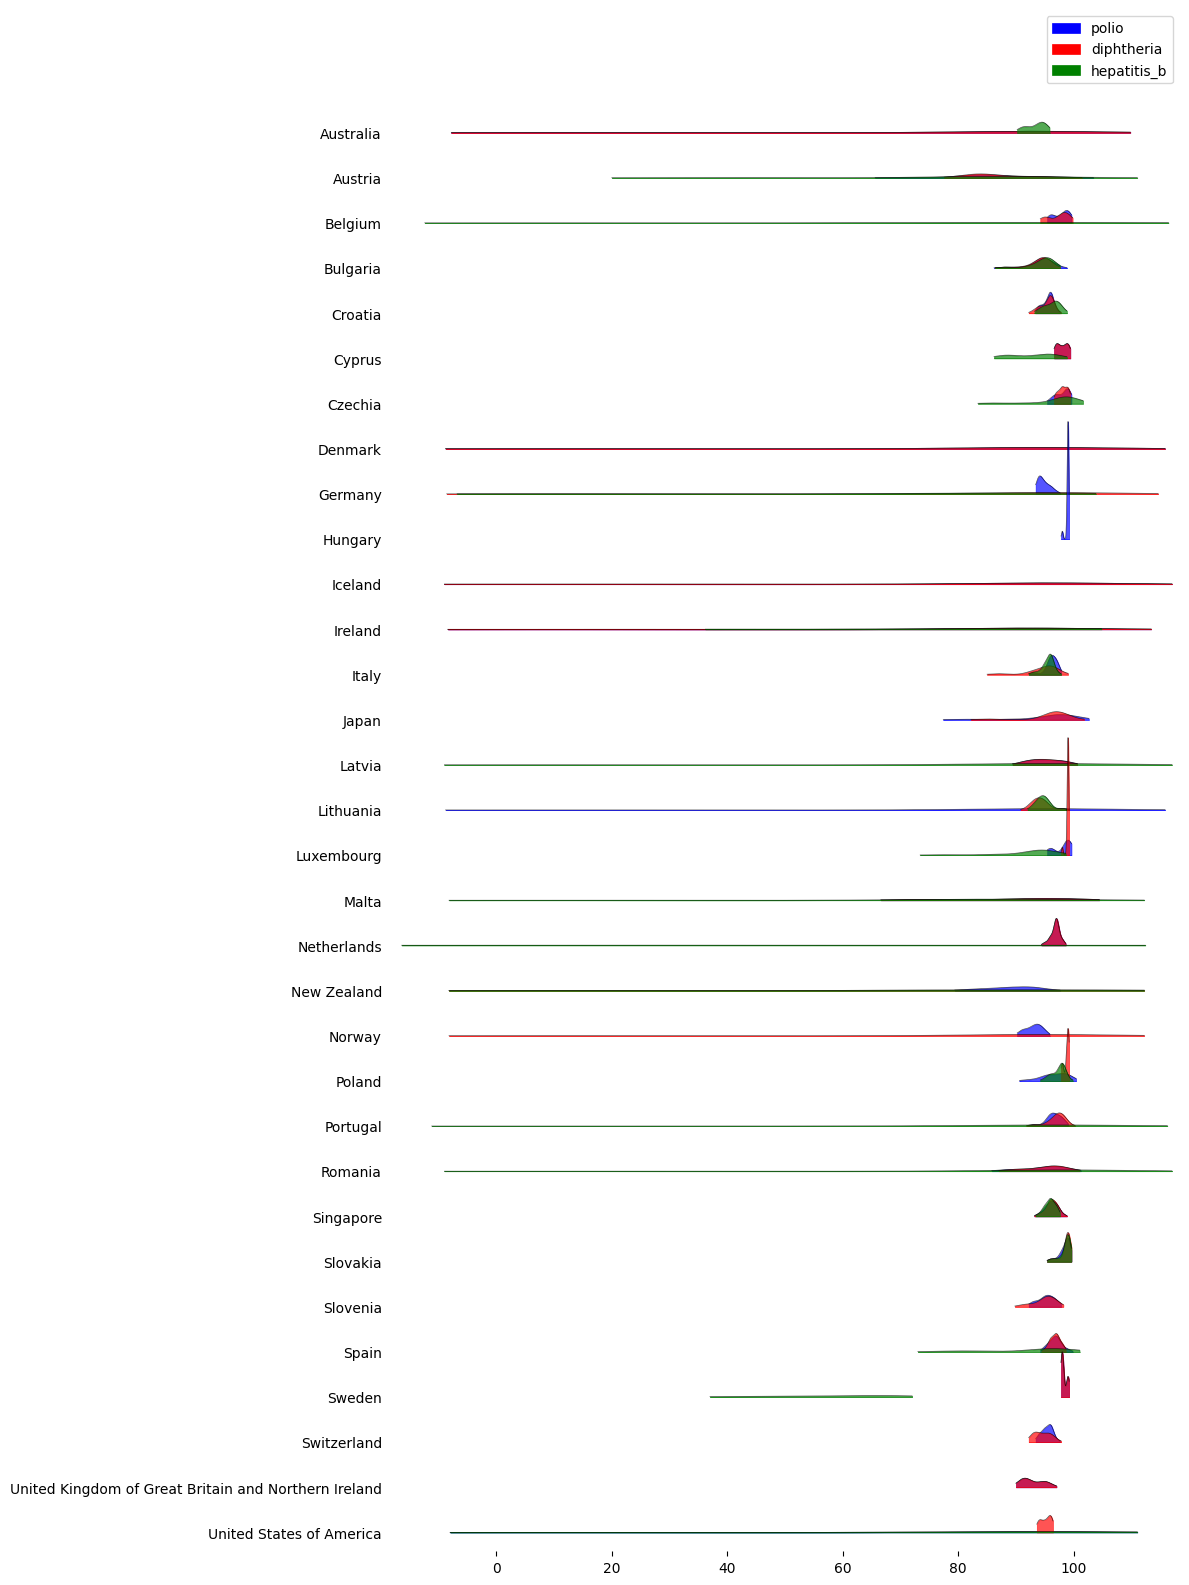

In [ ]:
fig, axes = joypy.joyplot(df_developed, by="country",column=['polio','diphtheria','hepatitis_b'],
                    color=[ 'blue', 'red','green'],
                    range_style='own',
                    alpha=.67,
                    legend=True,
                    overlap=2,
                    linewidth=.5,
                    figsize=(12, 16))


- Now, a joypy plot of the 'percentage_expenditure' and 'total_expenditure' by country is developed.

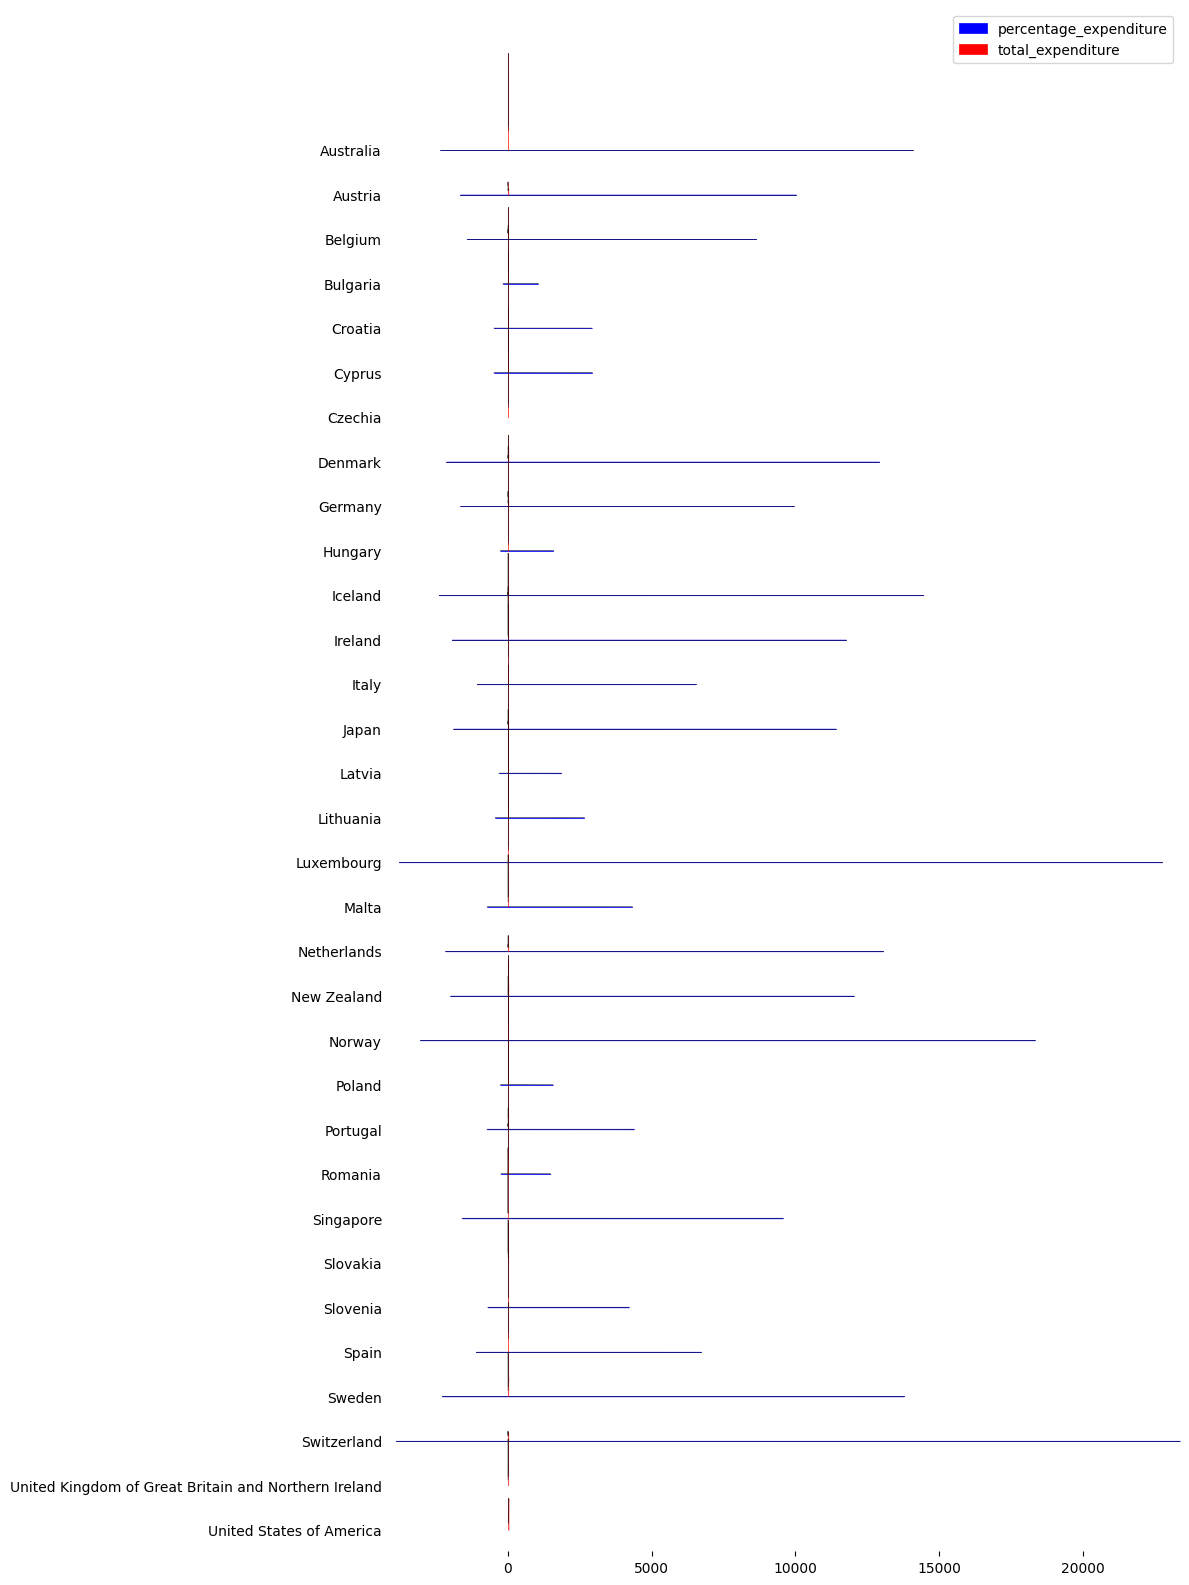

In [ ]:
fig, axes = joypy.joyplot(df_developed, by="country",column=['percentage_expenditure','total_expenditure'],
                    color=[ 'blue', 'red'],
                    range_style='own',
                    alpha=.67,
                    legend=True,
                    overlap=2,
                    linewidth=.5,
                    figsize=(12, 16))


### Descriptive Statistics

- In the following, it can be seen the main descriptive statistics for each column of the dataset.

In [ ]:
df_developed.describe().T

,count,mean,std,min,25%,50%,75%,max
year,512.0,2.007500e+03,4.614281e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
life_expectancy,512.0,7.919785e+01,3.930942e+00,69.90000,76.800000,7.925000e+01,8.170000e+01,8.900000e+01
adult_mortality,512.0,7.968555e+01,4.787758e+01,1.00000,58.000000,7.300000e+01,9.600000e+01,2.290000e+02
infant_deaths,512.0,1.494141e+00,4.585774e+00,0.00000,0.000000,0.000000e+00,1.000000e+00,2.800000e+01
alcohol,484.0,9.826736e+00,2.765858e+00,0.01000,8.617500,1.032000e+01,1.169750e+01,1.519000e+01
percentage_expenditure,512.0,2.703600e+03,3.824201e+03,0.00000,92.904052,8.466156e+02,4.102863e+03,1.947991e+04
hepatitis_b,339.0,8.804130e+01,2.048924e+01,2.00000,89.000000,9.500000e+01,9.700000e+01,9.900000e+01
measles,512.0,4.990059e+02,2.529085e+03,0.00000,0.000000,1.200000e+01,9.650000e+01,3.381200e+04
bmi,512.0,5.180391e+01,1.719683e+01,3.20000,53.775000,5.745000e+01,6.130000e+01,6.960000e+01
under-five deaths,512.0,1.810547e+00,5.384006e+00,0.00000,0.000000,0.000000e+00,2.000000e+00,3.300000e+01


- looking at the shape of the dataframe.

In [ ]:
df_developed.shape

(512, 21)

- looking at null values of the features along with their data types.

In [ ]:
df_developed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 112 to 2809
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       512 non-null    object 
 1   year                          512 non-null    int64  
 2   life_expectancy               512 non-null    float64
 3   adult_mortality               512 non-null    float64
 4   infant_deaths                 512 non-null    int64  
 5   alcohol                       484 non-null    float64
 6   percentage_expenditure        512 non-null    float64
 7   hepatitis_b                   339 non-null    float64
 8   measles                       512 non-null    int64  
 9   bmi                           512 non-null    float64
 10  under-five deaths             512 non-null    int64  
 11  polio                         512 non-null    float64
 12  total_expenditure             480 non-null    float64
 13  di

In [ ]:
# percentage of null values in each column
df_developed.isnull().sum()/len(df)*100

country                         0.000000
year                            0.000000
life_expectancy                 0.000000
adult_mortality                 0.000000
infant_deaths                   0.000000
alcohol                         0.953029
percentage_expenditure          0.000000
hepatitis_b                     5.888359
measles                         0.000000
bmi                             0.000000
under-five deaths               0.000000
polio                           0.000000
total_expenditure               1.089176
diphtheria                      0.000000
hiv_aids                        0.000000
gdp                             2.178353
population                      3.267529
thinnes_1_19_years              0.000000
thinness_5_9_years              0.000000
income_composition_resources    1.633764
schooling                       1.633764
dtype: float64

#### Interpolation

- Now, the columns 'hepatitis_b','gdp','population','alcohol','total_expenditure','income_composition_resources','schooling' will be interpolated with the methods 'backfill' and 'forwardfill' by country to reduce the number of null values.

In [ ]:
# Interpolation with 'ffill' e 'bfill' for a given country
cols_interpolate = ['hepatitis_b','gdp','population','alcohol','total_expenditure','income_composition_resources','schooling']
df_developed[cols_interpolate] = df_developed.groupby(by=['country'],as_index=False)[cols_interpolate].transform(lambda x: x.interpolate(method='backfill').interpolate(method='ffill'))

In [ ]:
# verifying again the null values
df_developed.isnull().sum()/len(df)*100

country                         0.000000
year                            0.000000
life_expectancy                 0.000000
adult_mortality                 0.000000
infant_deaths                   0.000000
alcohol                         0.000000
percentage_expenditure          0.000000
hepatitis_b                     4.356705
measles                         0.000000
bmi                             0.000000
under-five deaths               0.000000
polio                           0.000000
total_expenditure               0.000000
diphtheria                      0.000000
hiv_aids                        0.000000
gdp                             2.178353
population                      3.267529
thinnes_1_19_years              0.000000
thinness_5_9_years              0.000000
income_composition_resources    1.633764
schooling                       1.633764
dtype: float64

<Axes: >

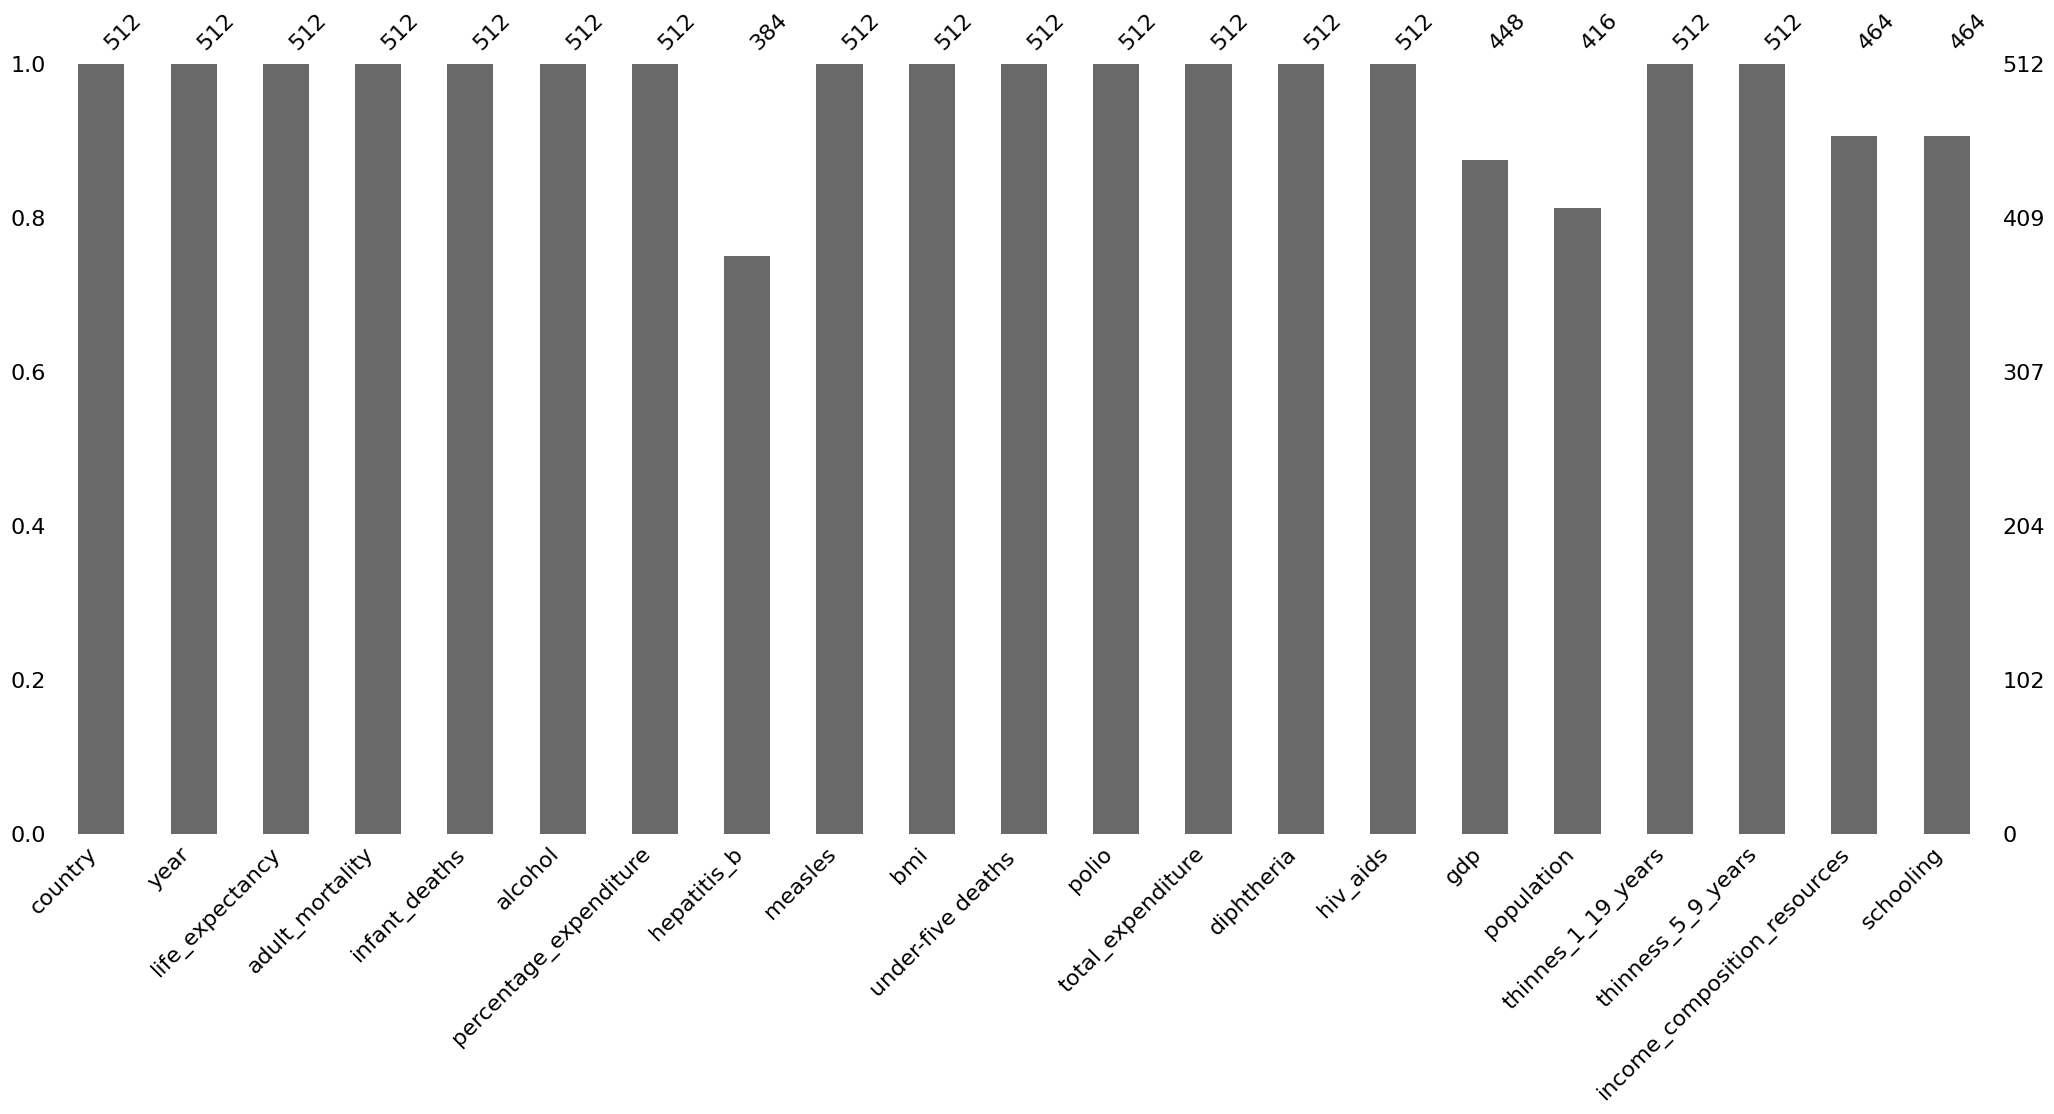

In [ ]:
# bar plot of null values
msno.bar(df_developed)

<Axes: >

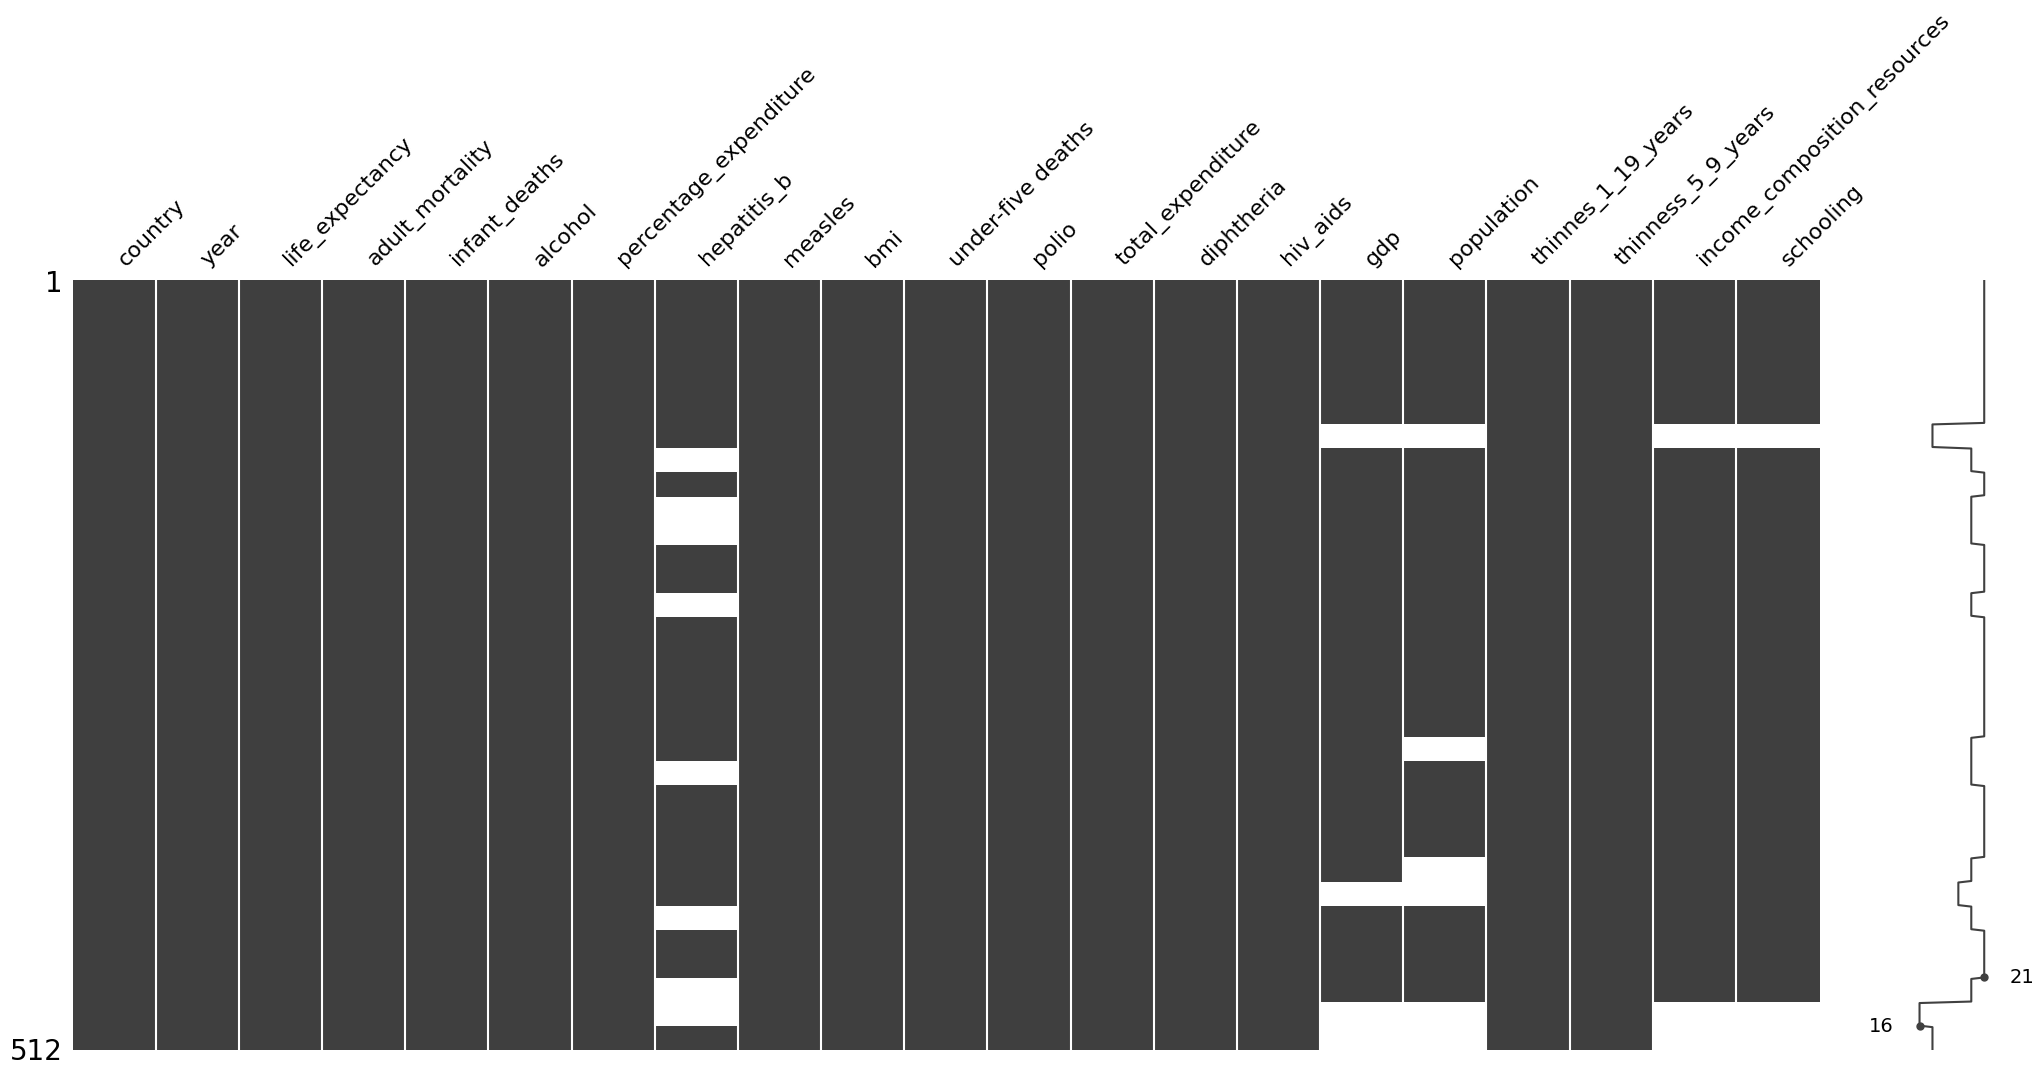

In [ ]:
# matrix of null values
msno.matrix(df_developed)

- let us drop 'hepatitis_b' cause ot contains a relative high number of null values.

In [ ]:
cols_drop = ['hepatitis_b']
df_developed = df_developed.drop(columns=cols_drop)


#### Feature Engineering

- Let us create the feature 'gdp_per_popul' (or, better, 'gdp_per_capita') by dividing 'gdp' by 'population'.

In [ ]:
df_developed['gdp_per_popul'] = df_developed['gdp']/df_developed['population']
# dropping the other two variables
df_developed = df_developed.drop(columns=['gdp','population'])

<Axes: >

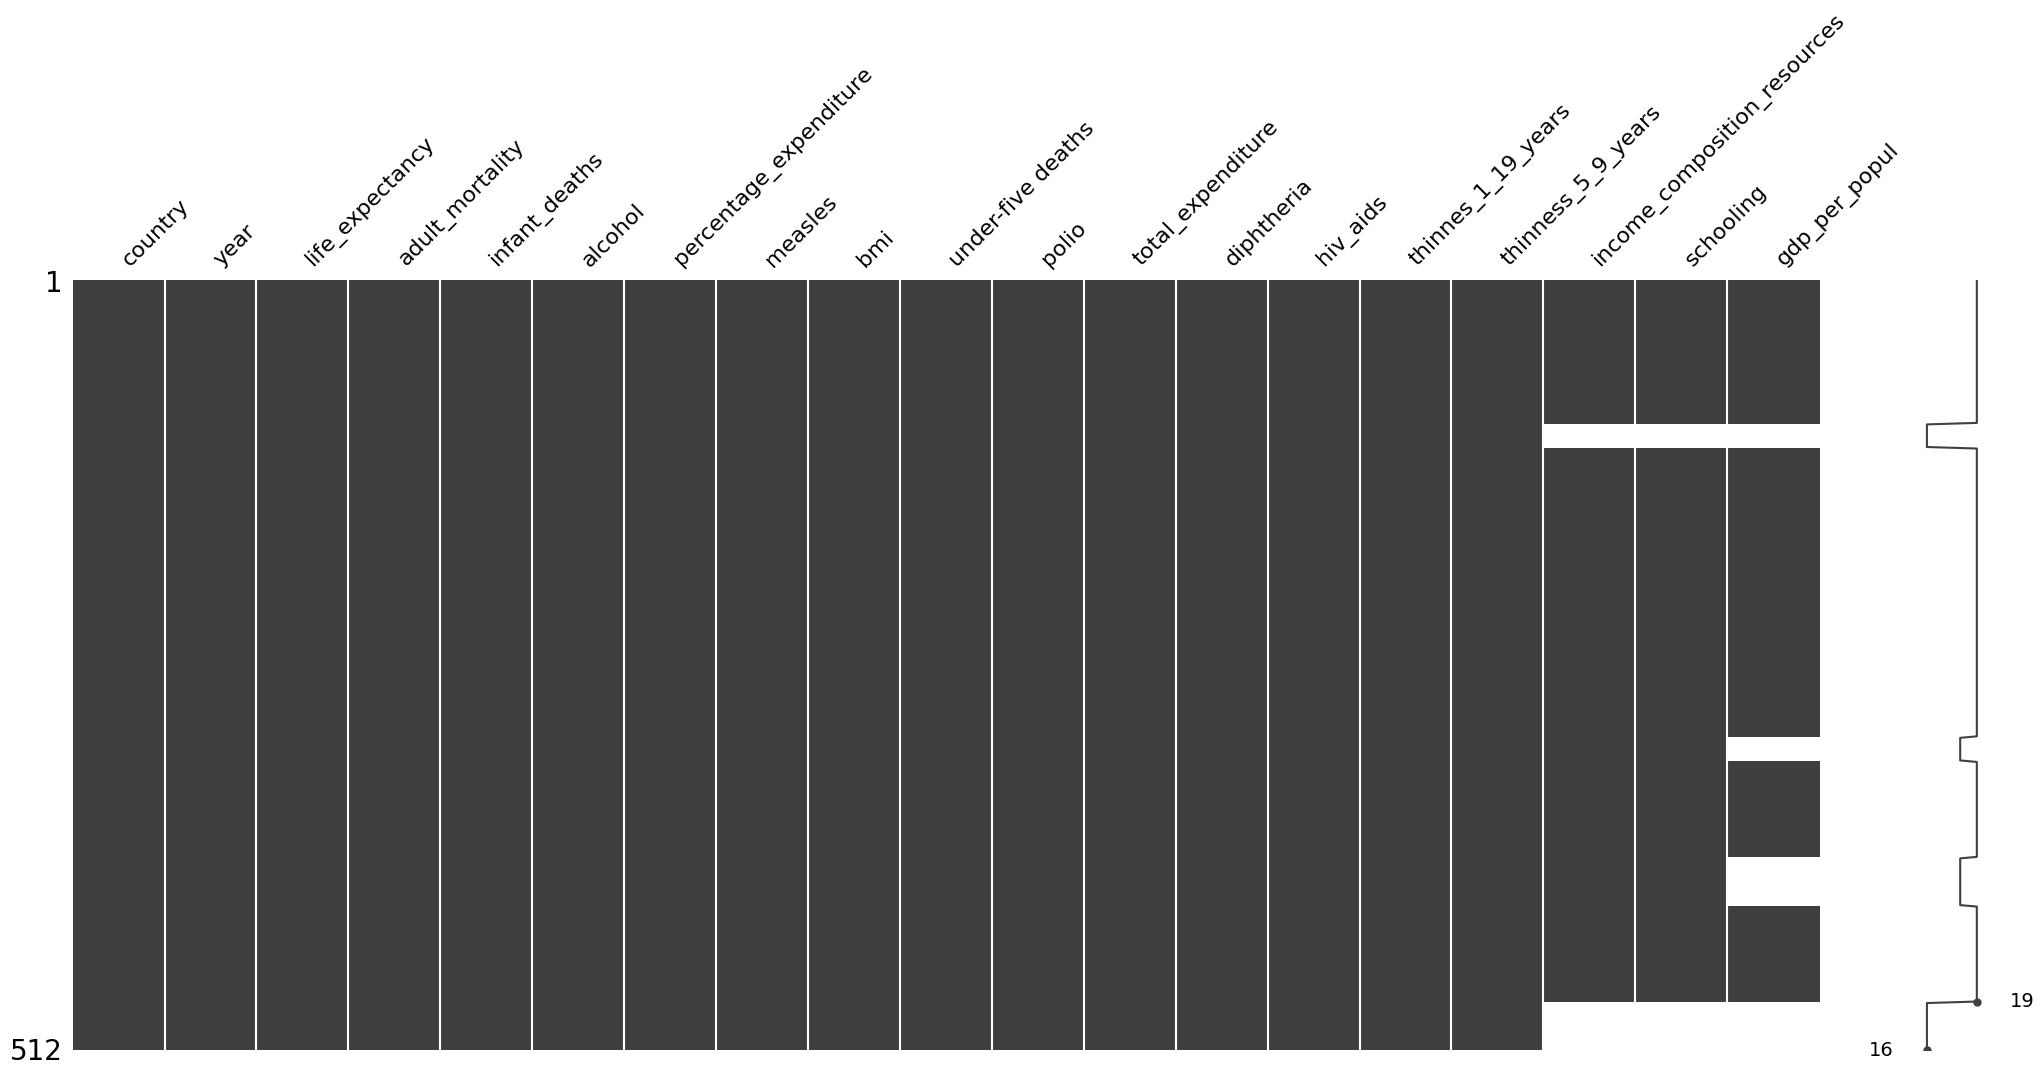

In [ ]:
# the matrix of null values again
msno.matrix(df_developed)

In [ ]:
# Let us simply drop these null values
df_developed = df_developed.dropna()

In [ ]:
# let us take a look at the shape of DF again
df_developed.shape

(416, 19)

In [ ]:
# getting numeric and categorical columns
cols_numeric = list(df_developed.select_dtypes(include=['number']).columns)
cols_categorical = df_developed.select_dtypes(include=["object"]).columns

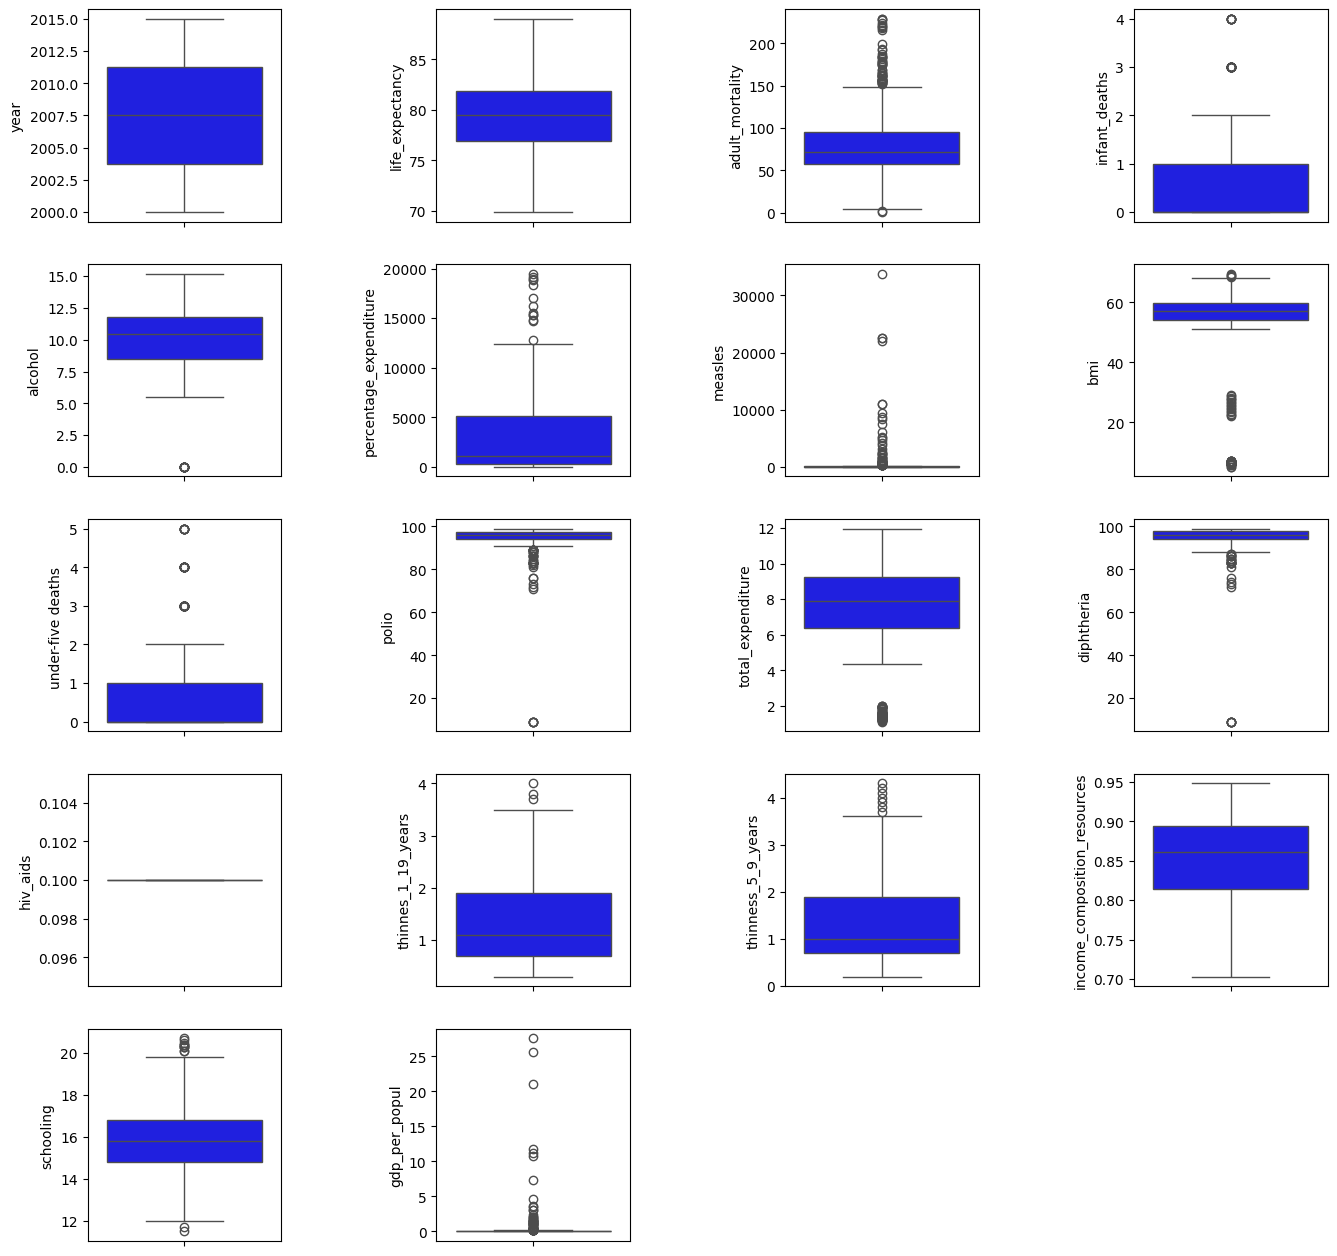

In [ ]:
# It creates a grid with n_rows and n_columns

nrows = 5 # number of rows
ncols = 4 # number of columns

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
plt.subplots_adjust(wspace=0.8)

# It itereates over the grid ploting the figures
idx = 0
for row in range(nrows):
  for col in range(ncols):
    try:
      ax = axes[row, col]
      sns.boxplot(y=df_developed[cols_numeric[idx]], data=df_developed, ax=ax,color='blue')
      idx += 1
    except:
      ax.set_visible(False)
plt.show()


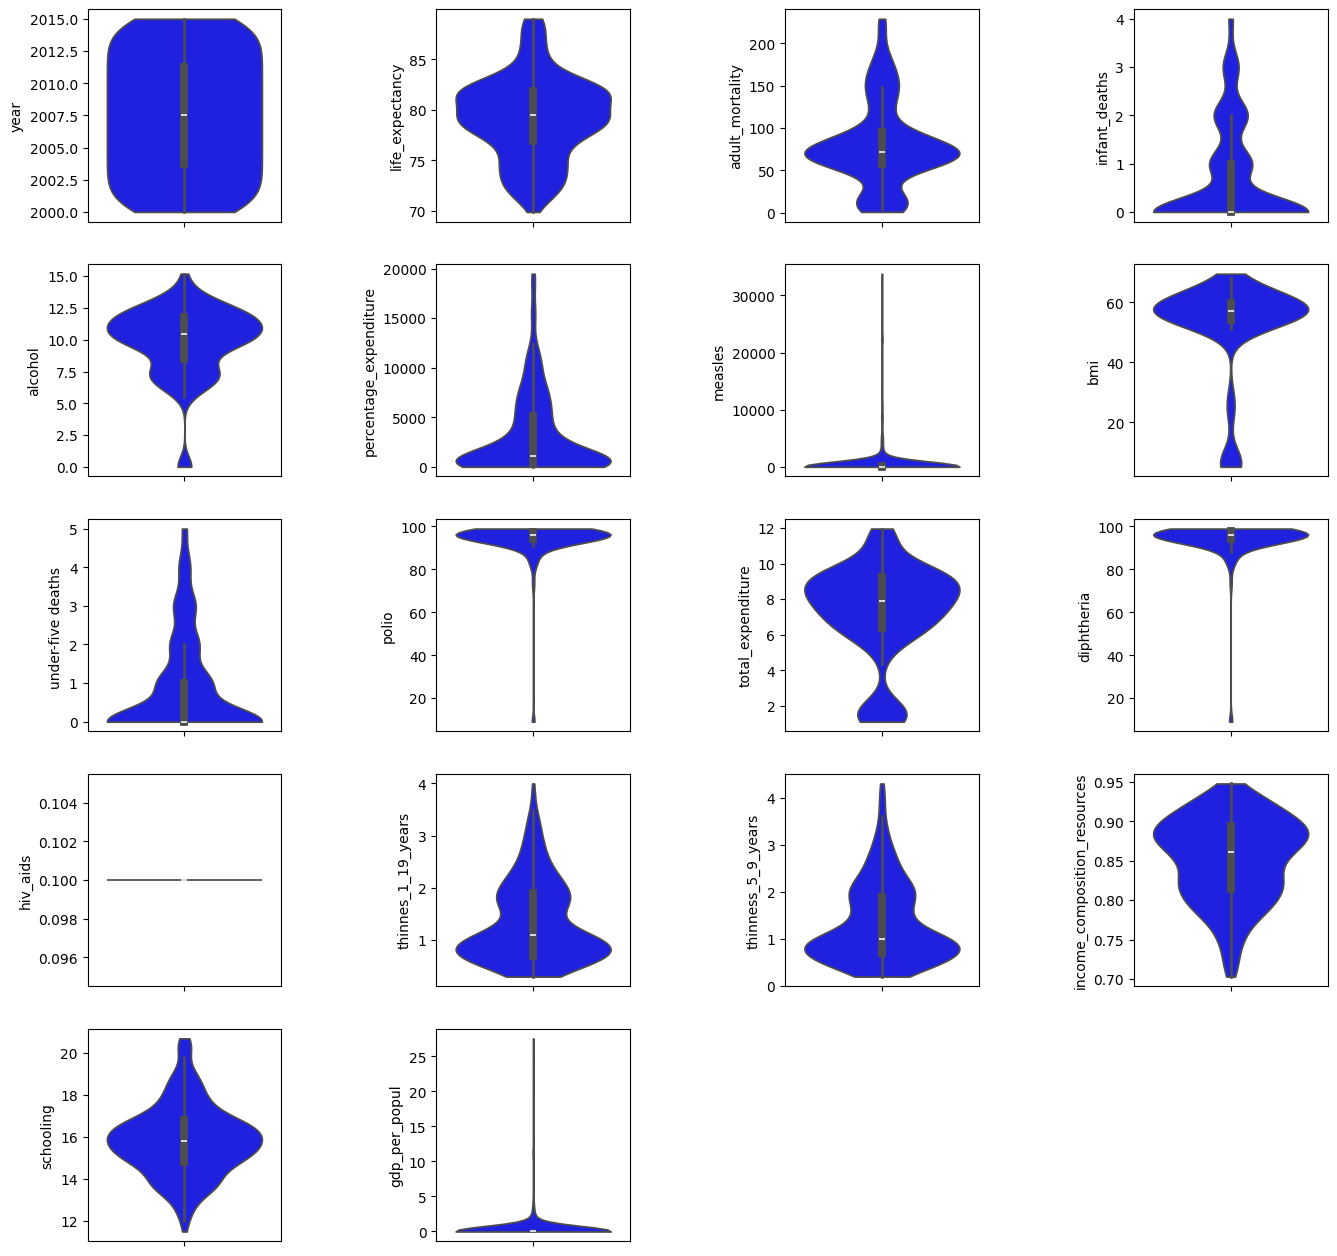

In [ ]:
# Creating a grid with n_rows and n_cols

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
plt.subplots_adjust(wspace=0.8)

# Iterating over the grid and making plots
idx = 0
for row in range(nrows):
  for col in range(ncols):
    try:
      ax = axes[row, col]
      sns.violinplot(y=df_developed[cols_numeric[idx]], data=df_developed,
                   ax=ax,color='blue',cut=0)

      idx += 1
    except:
      ax.set_visible(False)

plt.show()

In [ ]:
# 'hiv_adis' has no information. Let us drop it.
df_developed = df_developed.drop(columns=['hiv_aids'])

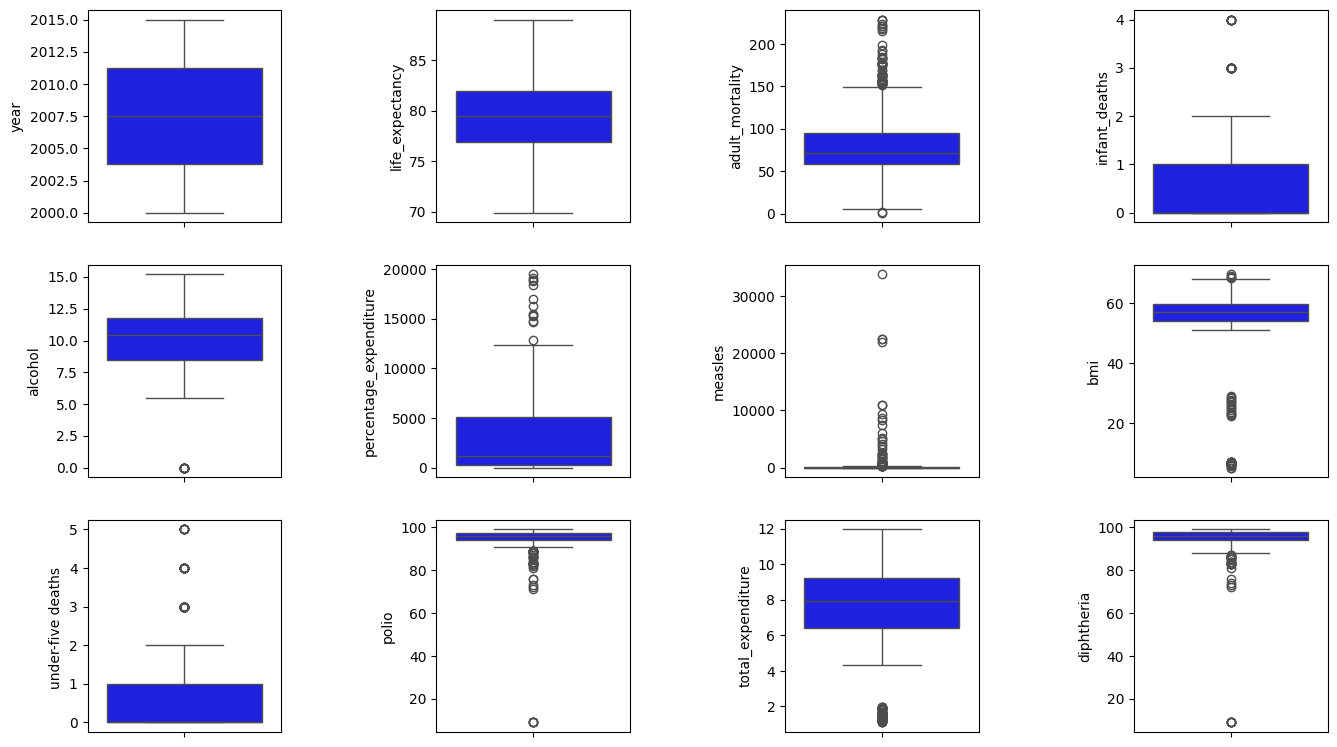

In [ ]:
# It creates a grid with n_rows and n_columns

nrows = 5 # number of rows
ncols = 4 # number of columns

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
plt.subplots_adjust(wspace=0.8)

# It iterates over the grid, plotting the figures
idx = 0
for row in range(nrows):
  for col in range(ncols):
    try:
      ax = axes[row, col]
      sns.boxplot(y=df_developed[cols_numeric[idx]], data=df_developed,
                   ax=ax,color='blue')

      idx += 1
    except:
      ax.set_visible(False)

plt.show()

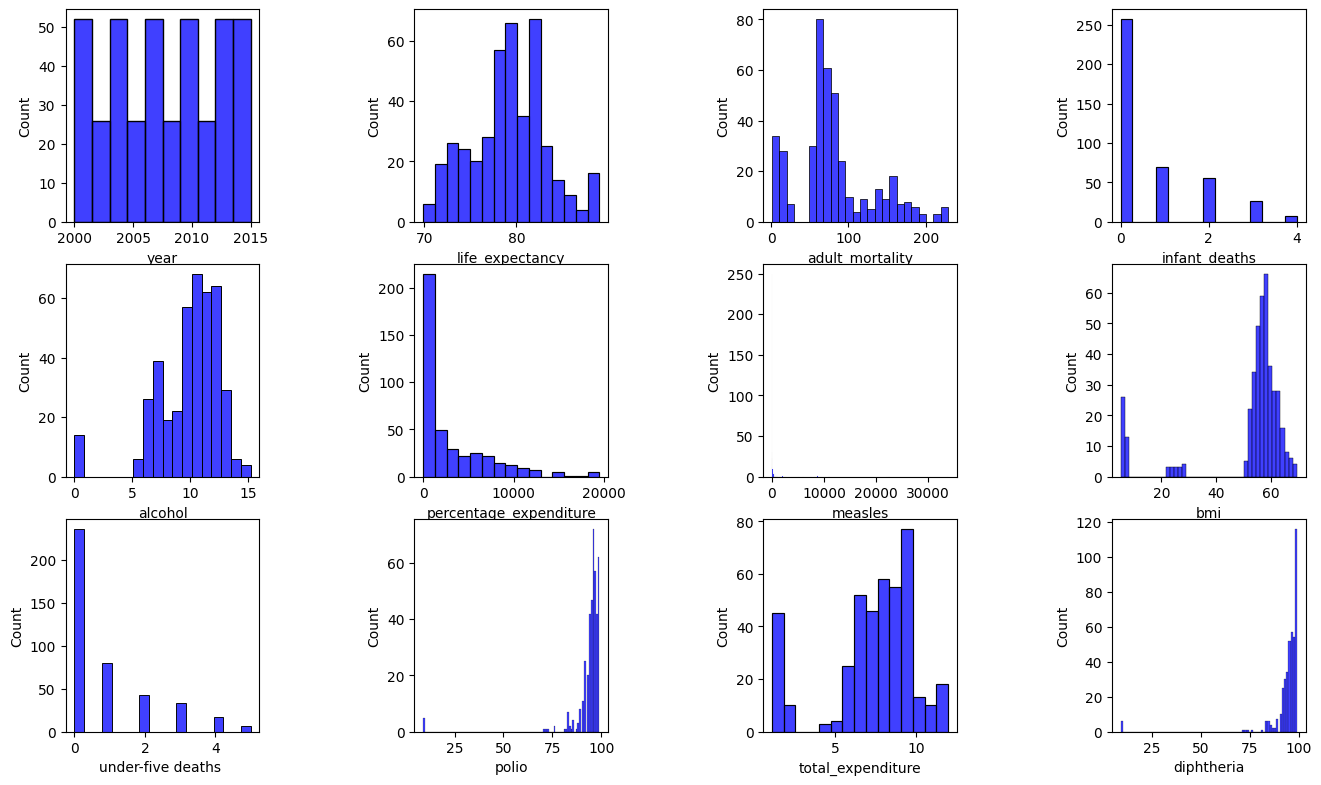

In [ ]:
# It creates a grid with n_rows and n_cols

nrows = 5 # number of rows
ncols = 4 # number of columns

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
plt.subplots_adjust(wspace=0.8)

# It iterates over the grid plotting the figures
idx = 0
for row in range(nrows):
  for col in range(ncols):
    try:
      ax = axes[row, col]
      sns.histplot(x=df_developed[cols_numeric[idx]], data=df_developed,
                   ax=ax,color='blue')

      idx += 1
    except:
      ax.set_visible(False)

plt.show()


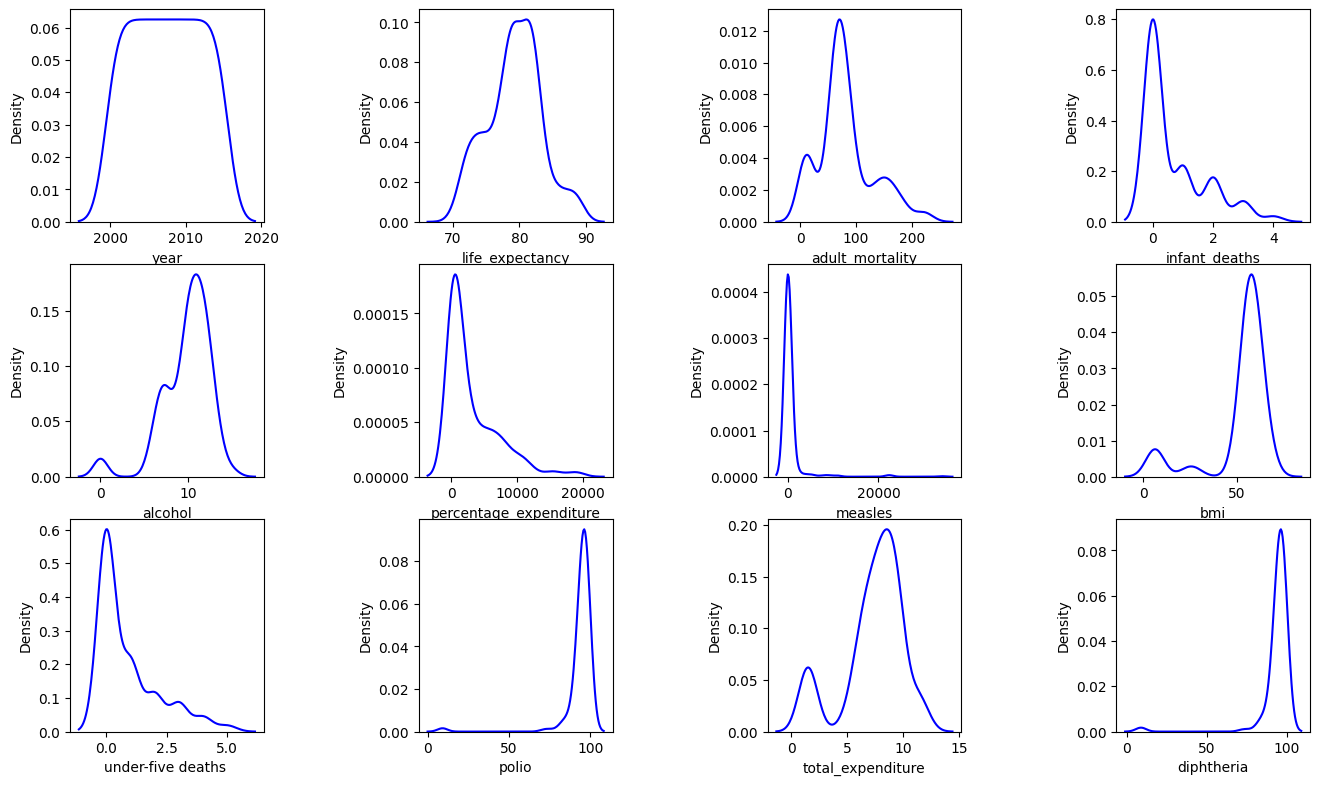

In [ ]:
# It creates a grid with n_rows and n_cols

nrows = 5 # number of rows
ncols = 4 # number of columns

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
plt.subplots_adjust(wspace=0.8)

# It iterates over the grid plotting the figures
idx = 0
for row in range(nrows):
  for col in range(ncols):
    try:
      ax = axes[row, col]
      sns.kdeplot(x=df_developed[cols_numeric[idx]], data=df_developed,
                   ax=ax,color='blue')

      idx += 1
    except:
      ax.set_visible(False)

plt.show()


#### Plots with PlotLy

- Plotting an animation of the 'life_expectancy' against 'years' for the countries.

In [ ]:
fig=px.line(df_developed.sort_values(by='year'),x='year',y='life_expectancy',animation_frame='country',
            animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country-wise Life Expectancy over Years')
fig.show()


- Plotting an animation of the 'adult_mortality' against 'years' for the countries.

In [ ]:
px.scatter(df_developed,y='adult_mortality',x='life_expectancy',color='country',size='life_expectancy',
           template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Adult Mortality')

#### 'Pair' Plots

- Let us plot "paired plots" concerning the 'life_expectancy' versus the features, in order to find out whether we can notice any relationship.

In [ ]:
# getting numeric and categorical columns
cols_numeric = list(df_developed.select_dtypes(include=['number']).columns)
cols_categorical = df_developed.select_dtypes(include=["object"]).columns

In [ ]:
# Function to plot the target variable against some features
def get_pairs(data, alvo, atributos, n):

    # Line groups with n plots by line
    row_groups = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop over the line groups in order to create a plot
    for ind in row_groups:
        plot = sns.pairplot(x_vars = ind, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

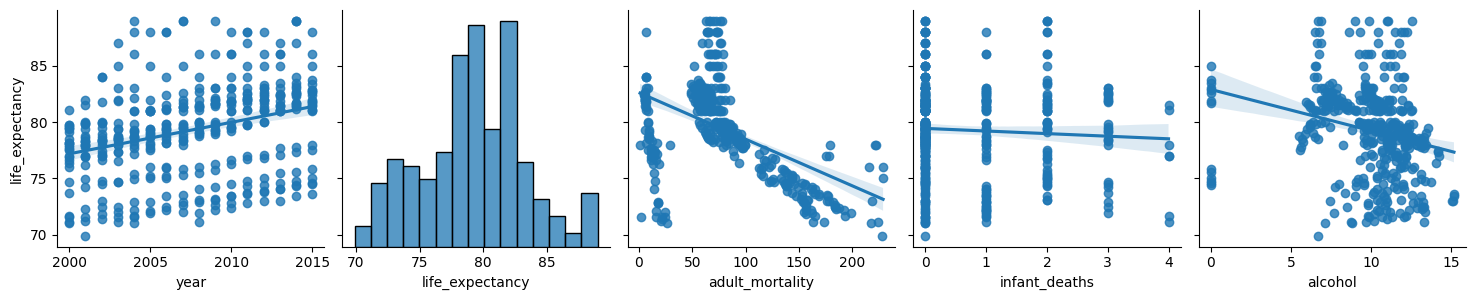

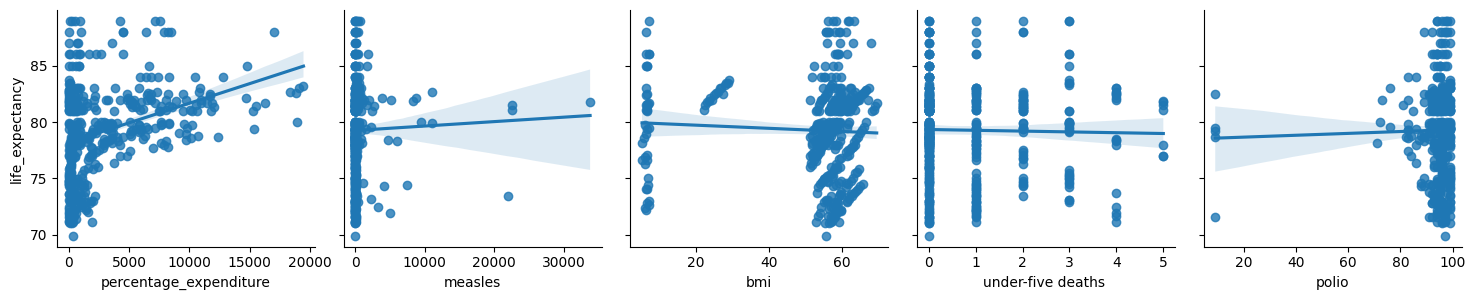

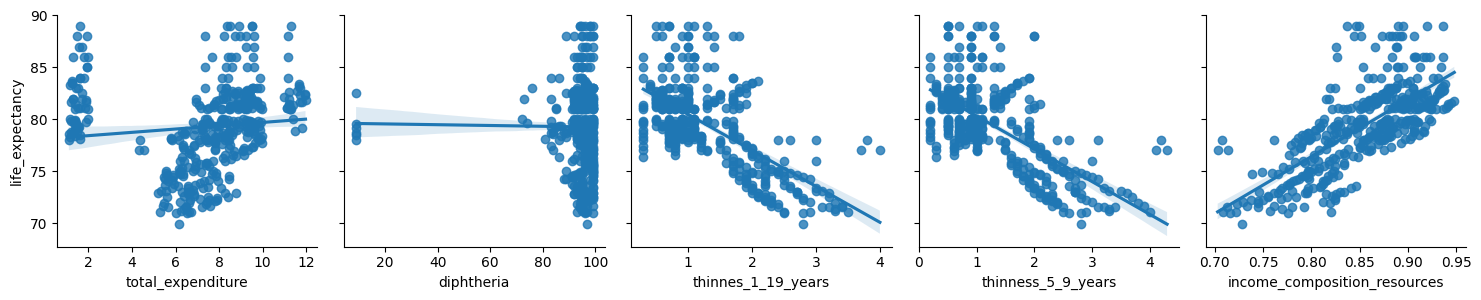

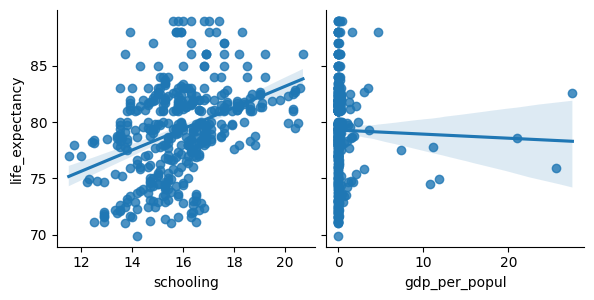

In [ ]:
target = ['life_expectancy']
get_pairs(df_developed, target, cols_numeric, 5)

### Feature Engineering: Data Transformation

- As shown in the above plots, this data is very skewed and there must be applied some data transformation in order to get new features whose distributions will be more gaussian-like. To achieve this, if the feature is left-skewed, we apply the square root transformation, otherwise the logarithmic transformation.

In [ ]:
import pandas as pd
from scipy.stats import skew

def transform_features(df):
  transformed_df = df.copy()
  for col in df.columns:
    # Calculate skewness
    skewness_value = skew(df[col])

    # Apply transformation based on skewness
    if skewness_value < -0.5:  # Left-skewed
      transformed_df[col] = np.sqrt(df[col])
    else:  # Not left-skewed or right-skewed
      transformed_df[col] = np.log1p(df[col])

  return transformed_df

# Example usage
df_developed[cols_numeric] = transform_features(df_developed[cols_numeric])
print(df_developed)

          country      year  life_expectancy  adult_mortality  infant_deaths  \
112     Australia  7.608871         4.428433         4.094345       0.693147   
113     Australia  7.608374         4.427239         1.945910       0.693147   
114     Australia  7.607878         4.424847         4.127134       0.693147   
115     Australia  7.607381         4.422449         4.127134       0.693147   
116     Australia  7.606885         4.418841         4.158883       0.693147   
...           ...       ...              ...              ...            ...   
2532  Switzerland  7.603399         4.406719         4.248495       0.000000   
2533  Switzerland  7.602900         4.454347         4.290459       0.000000   
2534  Switzerland  7.602401         4.442651         4.317488       0.000000   
2535  Switzerland  7.601902         4.418841         4.330733       0.000000   
2536  Switzerland  7.601402         4.390739         4.369448       0.000000   

       alcohol  percentage_expenditure 

- Now, let us visualize the distribution of the features again,

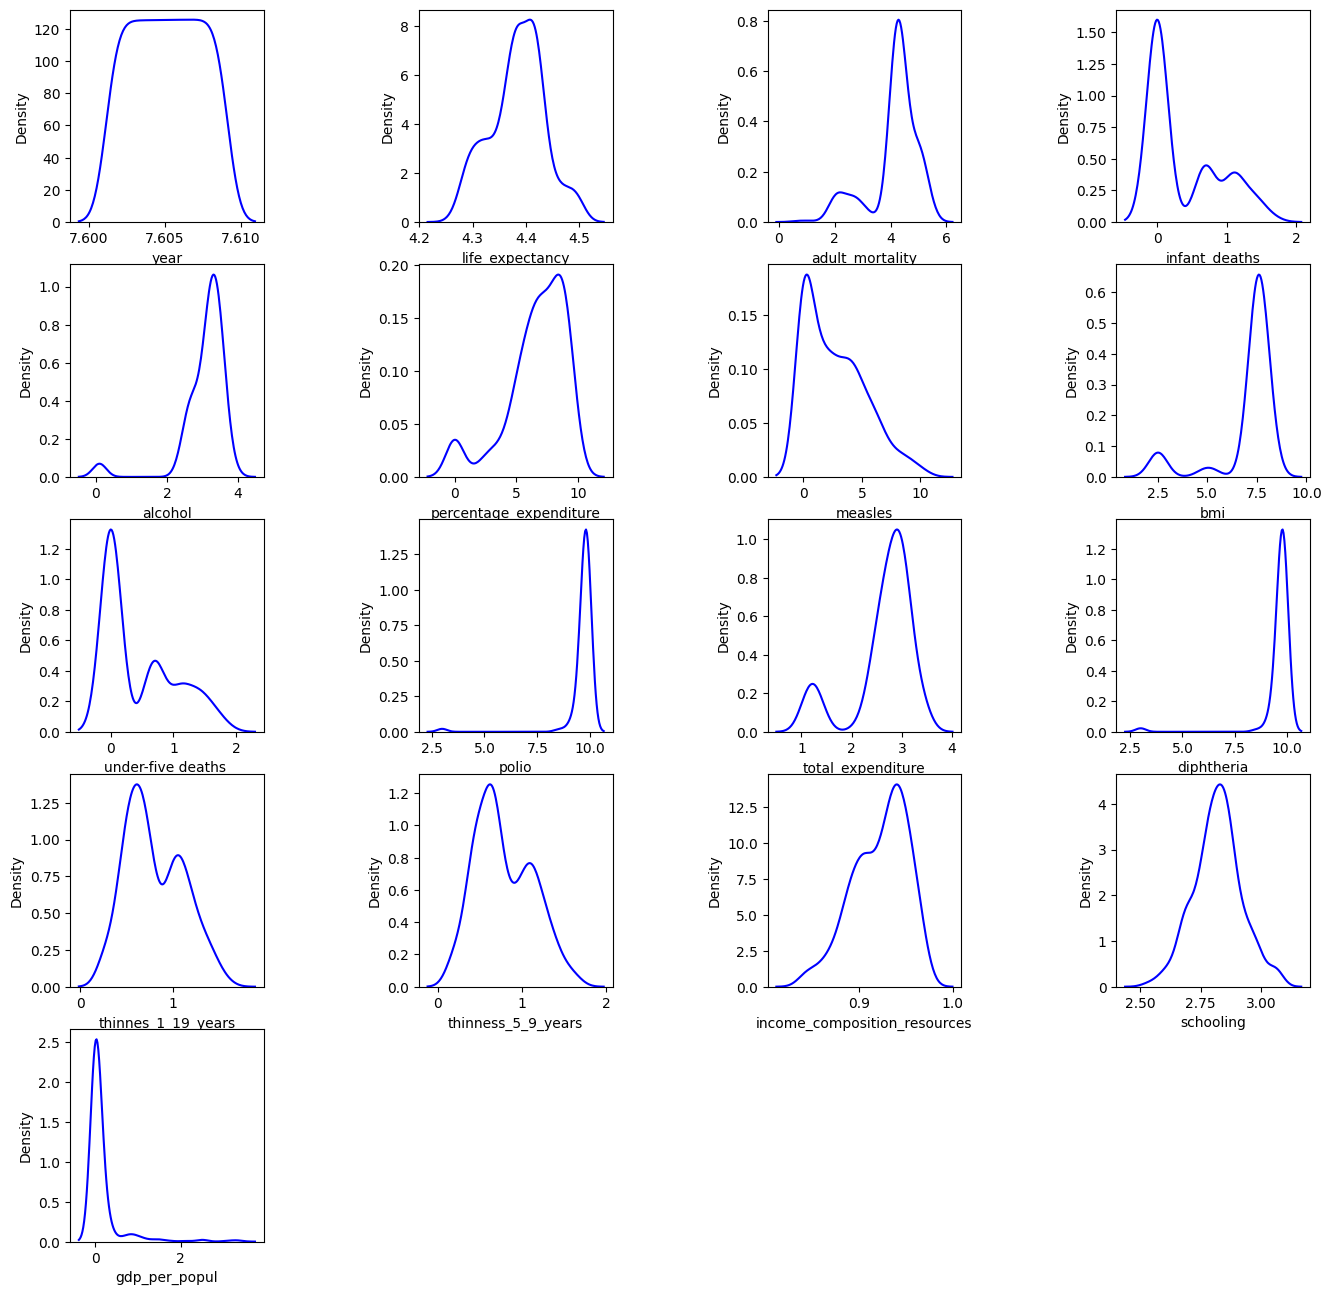

In [ ]:
# It creates a grid with n_rows and n_cols

nrows = 5 # number of rows
ncols = 4 # number of columns

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
plt.subplots_adjust(wspace=0.8)

# It iterates over the grid plotting the figures
idx = 0
for row in range(nrows):
  for col in range(ncols):
    try:
      ax = axes[row, col]
      sns.kdeplot(x=df_developed[cols_numeric[idx]], data=df_developed,
                   ax=ax,color='blue')

      idx += 1
    except:
      ax.set_visible(False)

plt.show()

### Correlation's Analysis

- Let us start by sorting the most correlated features correlated with 'life_expectancy', from the most positive correlation up to the most negative one. It is going to be addressed the Spearman correlation method, because it is a non-parametric method (it does not make assumptions about data's distribution) and there is clearly no evidence that the current data follow a normal distribution.

<Axes: >

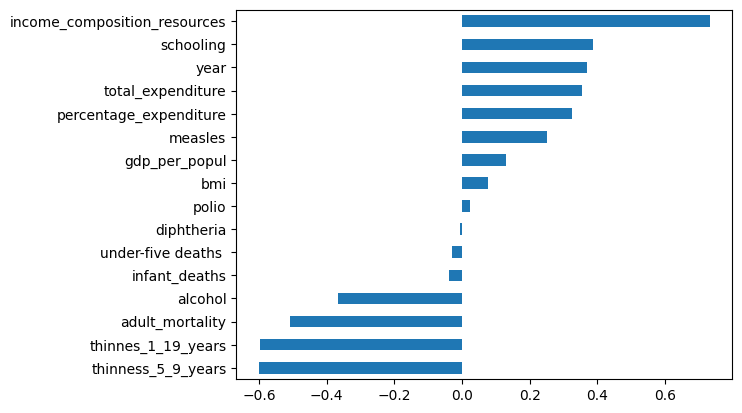

In [ ]:
# plotting the correlation of life expectancy with all other variables
pd.Series(df_developed.corr(method='spearman')['life_expectancy'].drop('life_expectancy')).sort_values().plot(kind='barh')

### Now, the correlations in absolute value.

<Axes: >

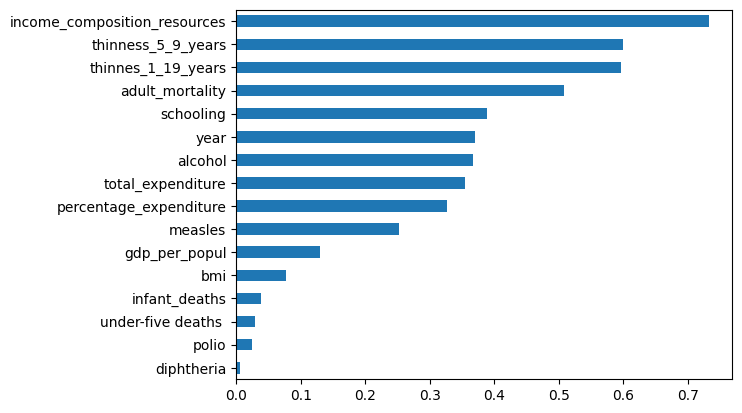

In [ ]:
# plotting the correlation of life expectancy with all other variables, but in absolute value
pd.Series(df_developed.corr(method='spearman').abs()['life_expectancy'].drop('life_expectancy')).sort_values().plot(kind='barh')

#### Heatmap of features's correlation

- Now it is going to be addressed the heatmap correlation plot. Afterwards, it is going to be performed a multicollinearity analysis between features (excluding the target, Life Expectancy).

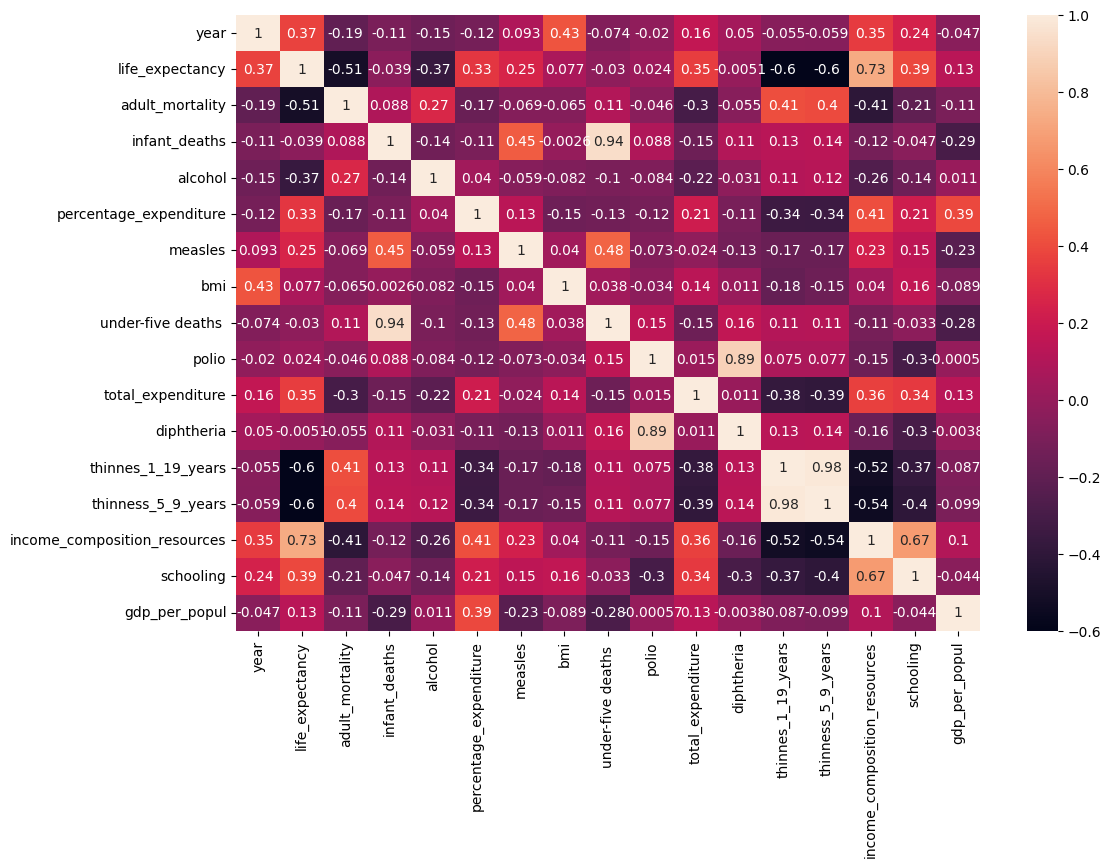

In [ ]:
plt.figure(figsize=[12,8])

sns.heatmap(df_developed.corr(method='spearman'),annot=True)

plt.show()

- Let us get the most highly correlated features in order to avoid multi-collinearity.

In [ ]:
# correltion matrix excluding the target
corr_matrix = df_developed.drop(columns=['life_expectancy']).corr(method='spearman')

# Set a correlation threshold (you can adjust this value)
correlation_threshold = 0.8

# Find highly correlated features
highly_correlated_features = set()

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)

# Display the list of highly correlated features
print("Highly correlated features:", highly_correlated_features)

Highly correlated features: {'under-five deaths ', 'diphtheria', 'thinness_5_9_years'}


In [ ]:
# dropping highly correlated features
cols_drop_corr = highly_correlated_features
df_developed = df_developed.drop(columns=cols_drop_corr)

- Plotting the features's correlation with the Target variable of the remaining columns.

<Axes: >

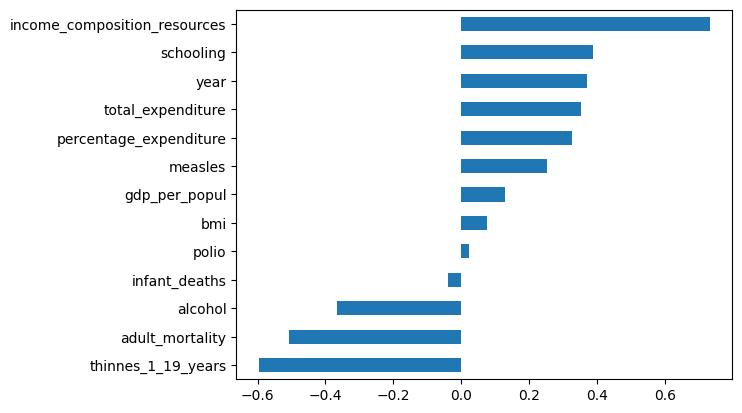

In [ ]:
pd.Series(df_developed.corr(method='spearman')['life_expectancy'].drop('life_expectancy')).sort_values().plot(kind='barh')

## Statistical and Machine Learning Analysis

In [ ]:
# getting the features
X_developed = df_developed.drop(columns=['life_expectancy'])
X_developed = X_developed.drop(columns=['country'])

# getting the target
y_developed = df_developed['life_expectancy']

In [ ]:
# Splitting data into training and testing sets and keeping the indices of the orignal DataFrame
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_developed, y_developed,X_developed.index,
                                                                                 test_size=0.25, random_state=RANDOM_STATE)

**VIF**, which stands for **Variance Inflation Factor**, is a statistical measure used to diagnose **multicollinearity** in regression analysis. Multicollinearity occurs when there is a high degree of correlation between two or more independent variables (features) in a regression model.

Here's a breakdown of VIF and its importance:

**Impact of Multicollinearity:**

- When independent variables are highly correlated, the coefficients of individual variables in the **regression model become unstable and unreliable**.
- It becomes difficult to interpret the effect of each variable on the dependent variable (target) because the correlated variables are providing **overlapping information**.
- VIF helps us quantify the severity of **multicollinearity**.

**How VIF Works:**

- VIF calculates how much the variance of a regression coefficient is inflated due to multicollinearity.
- **It essentially tells us how much more uncertain the coefficient of a particular variable is compared to a scenario with no multicollinearity**.
- A VIF value of 1 indicates no inflation, while values greater than 1 suggest increasing levels of multicollinearity.

**Using VIF for Model Improvement:**

- Thresholds for VIF can vary depending on the field and sample size. Common rules of thumb suggest:
    - VIF < 5: No significant multicollinearity
    - 5 <= VIF < 10: Moderate multicollinearity, consider investigating further
    - VIF >= 10: High multicollinearity, corrective action needed
- Based on VIF values, you might take steps to address multicollinearity, such as:
    - Removing highly correlated features
    - Combining correlated features into a single variable
    - Using regularization techniques (e.g., L1 or L2 regularization)

**Benefits of Using VIF:**

- Helps identify potential problems with model interpretability and coefficient stability.
- Provides a basis for making informed decisions about model improvement strategies.


#### Now, normalizing the data, because VIF and Regression Models work better in this way.

In [ ]:
scaler_developed = MinMaxScaler()
# fitting the training set
scaler_developed.fit(X_train)
# transforming training and testing sets
X_train = pd.DataFrame(scaler_developed.transform(X_train),columns=X_train.columns,index=indices_train)
X_test = pd.DataFrame(scaler_developed.transform(X_test),columns=X_test.columns,index=indices_test)

# copies for ML training and evaluation
X_train_ml = X_train.copy()
X_test_ml = X_test.copy()
y_train_ml = y_train.copy()
y_test_ml = y_test.copy()

In [ ]:
# visualization the first five elements
X_train.head(5)

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,thinnes_1_19_years,income_composition_resources,schooling,gdp_per_popul
252,0.200598,0.798655,0.000000,0.858098,0.632120,0.365021,0.895548,0.978141,0.829869,0.241577,0.729025,0.815472,0.000827
1171,0.933565,0.648331,0.000000,0.692433,0.914900,0.000000,0.051070,0.000000,0.799585,0.319792,0.873548,0.852099,0.045314
1179,0.400897,0.697902,0.000000,0.680270,0.701184,0.000000,0.874040,0.985465,0.806532,0.281714,0.752665,0.768623,0.046857
1544,0.600896,0.747832,0.000000,0.863569,0.773755,0.000000,0.889134,0.978141,0.746175,0.281714,0.768381,0.269080,0.007976
2051,0.200598,0.890485,0.861353,0.766302,0.638822,0.373187,0.842177,0.992751,0.599423,0.713703,0.397460,0.481226,0.004504


### VIF (Variance Inflation Factor) Features's Analyses

- Now, let us address VIF analysis for the features in this dataset and drop columns accordingly in such a way that the features VIFs of all features be in a reasonable value.

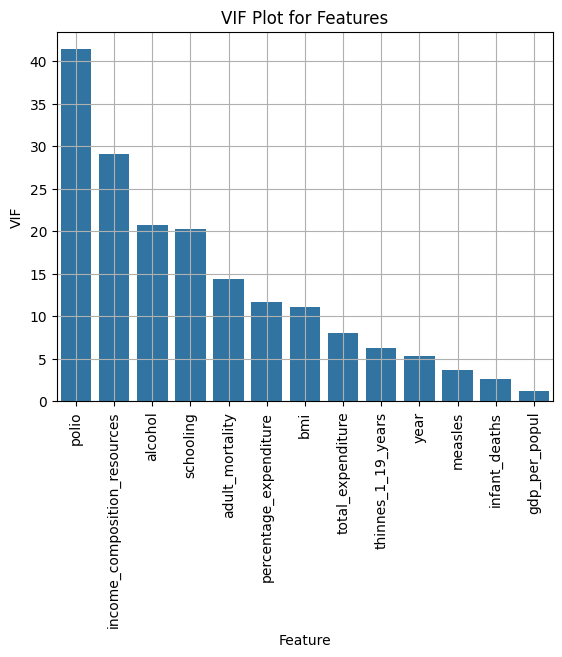

In [ ]:
# Calculate VIFs using statsmodels
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Create the VIF DataFrame
vif_df = pd.DataFrame({"feature": X_train.columns, "VIF": vif})

# Sort by VIF in descending order
vif_df = vif_df.sort_values(by=["VIF"], ascending=False)

# Create the VIF plot
sns.barplot(x="feature", y="VIF", data=vif_df)
plt.xlabel("Feature")
plt.ylabel("VIF")
plt.title("VIF Plot for Features")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(True)
plt.show()

- let us drop some features in order to diminish VIFs

In [ ]:
X_train = X_train.drop(columns=['polio','alcohol','bmi'])
X_test = X_test.drop(columns=['polio','alcohol','bmi'])

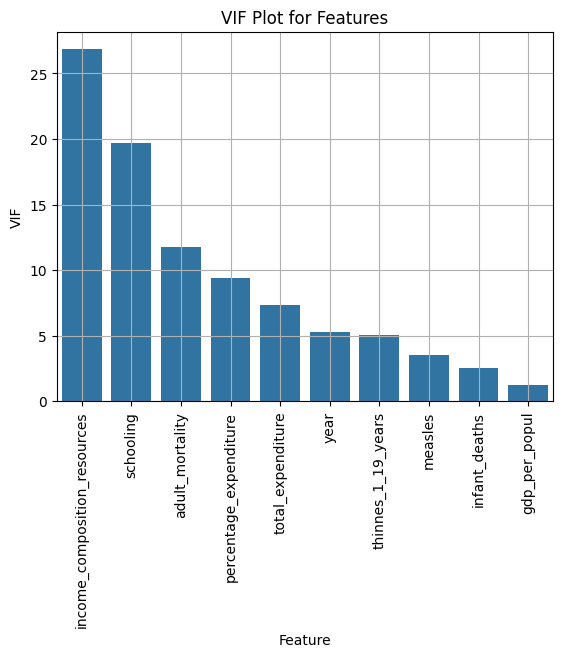

In [ ]:
# Calculate VIFs using statsmodels
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Create the VIF DataFrame
vif_df = pd.DataFrame({"feature": X_train.columns, "VIF": vif})

# Sort by VIF in descending order
vif_df = vif_df.sort_values(by=["VIF"], ascending=False)

# Create the VIF plot
sns.barplot(x="feature", y="VIF", data=vif_df)
plt.xlabel("Feature")
plt.ylabel("VIF")
plt.title("VIF Plot for Features")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(True)
plt.show()

- let us drop some features, again, in order to diminish VIFs

In [ ]:
X_train = X_train.drop(columns=['schooling','percentage_expenditure'])
X_test = X_test.drop(columns=['schooling','percentage_expenditure'])

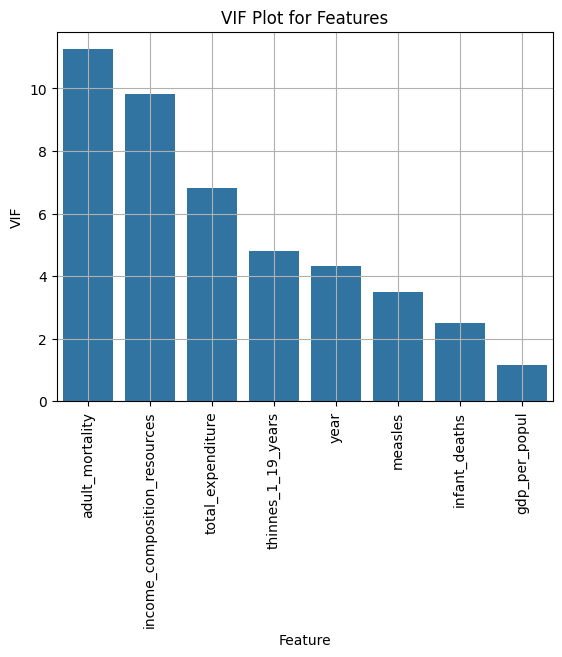

In [ ]:
# Calculate VIFs using statsmodels
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Create the VIF DataFrame
vif_df = pd.DataFrame({"feature": X_train.columns, "VIF": vif})

# Sort by VIF in descending order
vif_df = vif_df.sort_values(by=["VIF"], ascending=False)

# Create the VIF plot
sns.barplot(x="feature", y="VIF", data=vif_df)
plt.xlabel("Feature")
plt.ylabel("VIF")
plt.title("VIF Plot for Features")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(True)
plt.show()

- let us drop some features, again, in order to diminish VIFs

In [ ]:
#X_train = X_train.drop(columns=['infant_deaths','year'])
#X_test = X_test.drop(columns=['infant_deaths','year'])

In [ ]:
X_train = X_train.drop(columns=['adult_mortality','total_expenditure'])
X_test = X_test.drop(columns=['adult_mortality','total_expenditure'])

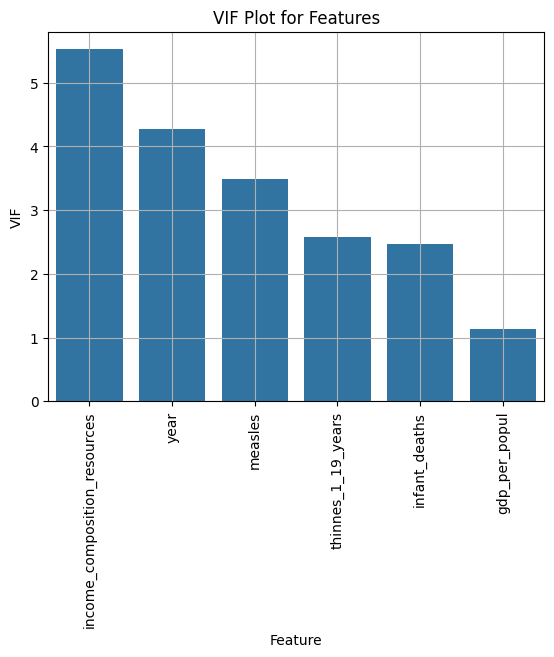

In [ ]:
# Calculate VIFs using statsmodels
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Create the VIF DataFrame
vif_df = pd.DataFrame({"feature": X_train.columns, "VIF": vif})

# Sort by VIF in descending order
vif_df = vif_df.sort_values(by=["VIF"], ascending=False)

# Create the VIF plot
sns.barplot(x="feature", y="VIF", data=vif_df)
plt.xlabel("Feature")
plt.ylabel("VIF")
plt.title("VIF Plot for Features")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(True)
plt.show()

## Statistical Modeling

- Let us use statsmodels to fit a linear regression in such a dataset.

In [ ]:
# target and features
y_train = y_train
X_fit = sm.add_constant(X_train)
# model
model_developed = OLS(y_train, X_fit)
results = model_developed.fit()
# summary of the modeling
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     88.49
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           8.09e-64
Time:                        12:34:06   Log-Likelihood:                 646.93
No. Observations:                 312   AIC:                            -1280.
Df Residuals:                     305   BIC:                            -1254.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.3345      0.010    445.852      0.000       4.315       4.354
year                             0.0157      0.006      2.543      0.011       0.004       0.028
infant_deaths                    0.0079      0.007      1.136      0.257      -0.006       0.022
measles                          0.0110      0.009      1.226      0.221      -0.007       0.029
thinnes_1_19_years              -0.0802      0.010     -8.142      0.000      -0.100      -0.061
income_composition_resources     0.1071      0.011      9.337      0.000       0.085       0.130
gdp_per_popul                    0.0276      0.014      2.006      0.046       0.001       0.055
==============================================================================
Omnibus:                       55.189   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.201
Skew:                           1.084   Prob(JB):                     8.57e-19
Kurtosis:                       4.303   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train.shape,X_test.shape

((312, 6), (104, 6))

- Let us now perform predictions in the testing set. It has a reasonable performance.

In [ ]:
preds_test = results.predict(sm.add_constant(X_test))
print(r2_score(y_test,preds_test))

0.5370755826861662


- Plotting True vs Predicted Values

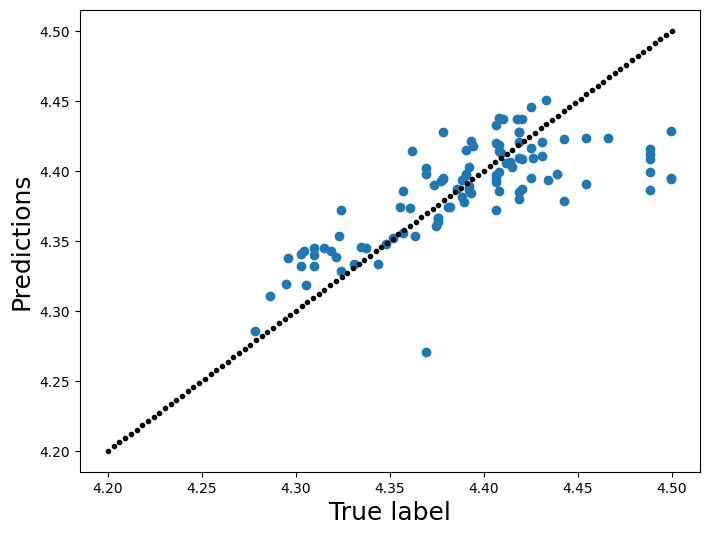

In [ ]:
x_plot = np.linspace(4.2,4.5,100)

plt.figure(figsize=[8,6])

plt.scatter(y_test,preds_test)
plt.scatter(x_plot,x_plot,color='black',marker='.')

plt.xlabel('True label',size=18)
plt.ylabel('Predictions',size=18)

plt.show()

### Residual and Partial-Correlations's Plots

- Now, let us address residuals and PACF plots in order to understand residuals's auto-correlations.

<Axes: >

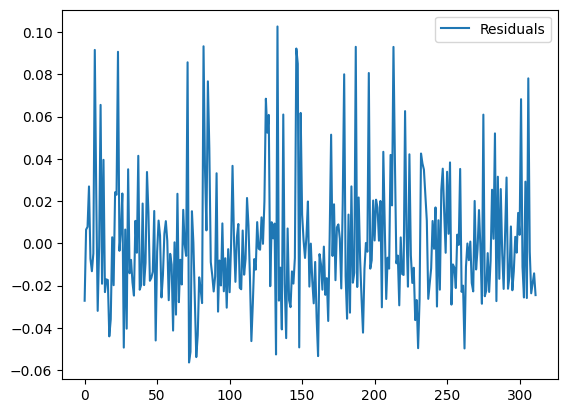

In [ ]:
developed_residuals_plot = pd.DataFrame(results.resid,columns=['Residuals']).reset_index(drop=True)
developed_residuals = pd.DataFrame(results.resid,columns=['Residuals'])
developed_residuals_plot.plot()

- The residuals have a non-gaussian behavior.

- Now the auto-correlation plots. It seems that the auto-correlations behave accordingly, having low correlations between them.

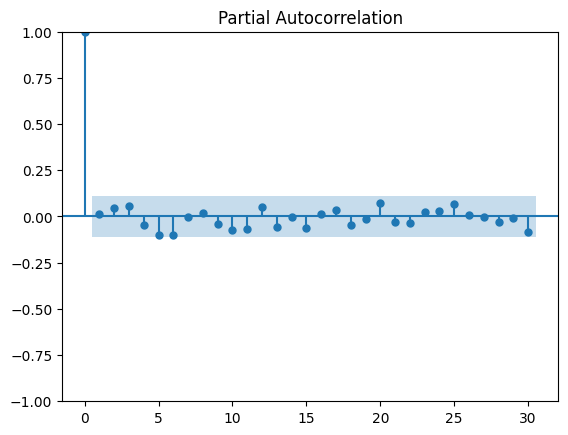

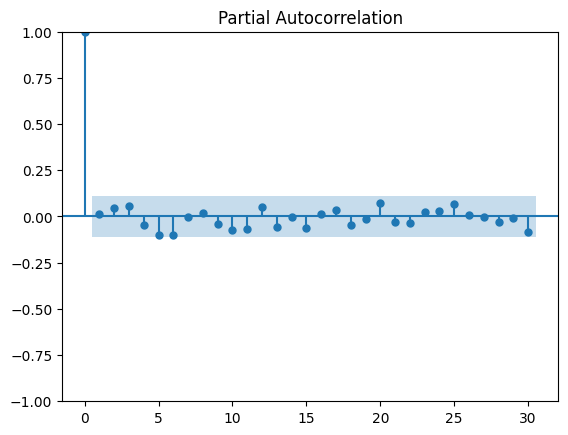

In [ ]:
# Autocorrelation and partial autocorrelation functions
plot_pacf(results.resid, lags=30)  # PACF plot

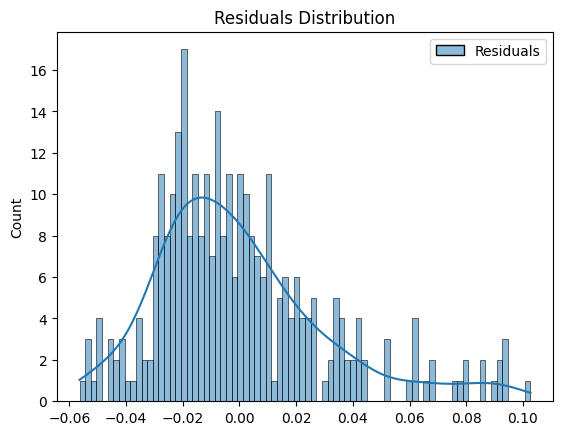

In [ ]:
# Residuals distribution
plt.subplot(1, 1, 1)
sns.histplot(developed_residuals, kde=True, bins=80)
plt.title('Residuals Distribution')
plt.show()

#### Residuals Normality Tests

- Now, in order to know whether the residuals's distribution is Gaussian-like or not, let us make a Shapiro statistical test, as well as QQ-Plot.


In [ ]:
alpha = 0.05

# Perform the test and obtain test statistic and p-value
#stat, p_value = shapiro(developed_residuals)
stat, p_value = shapiro(developed_residuals[developed_residuals['Residuals']>-1.5])
if p_value > alpha:
    print(f"The residuals follow a normal distribution (fail to reject H0), the p-values is {p_value}")
else:
    print(f"The residuals do not follow a normal distribution (reject H0), the p-values is {p_value}")
# Interpretation:
# - p-value > 0.05 suggests normality at the 95% confidence level.

The residuals do not follow a normal distribution (reject H0), the p-values is 2.349415280378242e-11


## Machine Learning Modeling

- In this part, a model will be created by using a Random Forest Regressor and check its performance in the Training and Testing Sets. Afterwards, feature importances plots and **XAI** with SHAP will be performed in order to get insights from model's predictions.

In [ ]:
# Fitting a Random Forest Regressor
model_scikit = RandomForestRegressor(n_estimators=20,max_depth=20,random_state=RANDOM_STATE)

model_scikit.fit(X_train_ml,y_train_ml)

RandomForestRegressor(max_depth=20, n_estimators=20, random_state=88)

- Let us check the model's performance in the Training and Testing sets.

In [ ]:
# verifying training predictions
pred_train = model_scikit.predict(X_train_ml)
r2_score(y_train_ml,pred_train)

0.9721083871136371

In [ ]:
# verifying testing predictions
pred_test_ml = model_scikit.predict(X_test_ml)
r2_score(y_test_ml,pred_test_ml)

0.8202799639372297

- Now, plotting True vs Predicted Values in a Scatter Plot

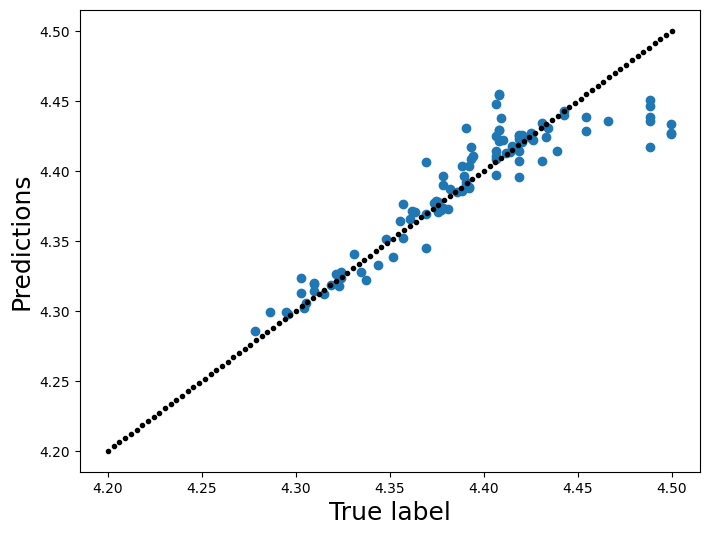

In [ ]:
x_plot = np.linspace(4.2,4.5,100)

plt.figure(figsize=[8,6])

plt.scatter(y_test_ml,pred_test_ml)
plt.scatter(x_plot,x_plot,color='black',marker='.')

plt.xlabel('True label',size=18)
plt.ylabel('Predictions',size=18)

plt.show()

- Let us get feature importances of RF model

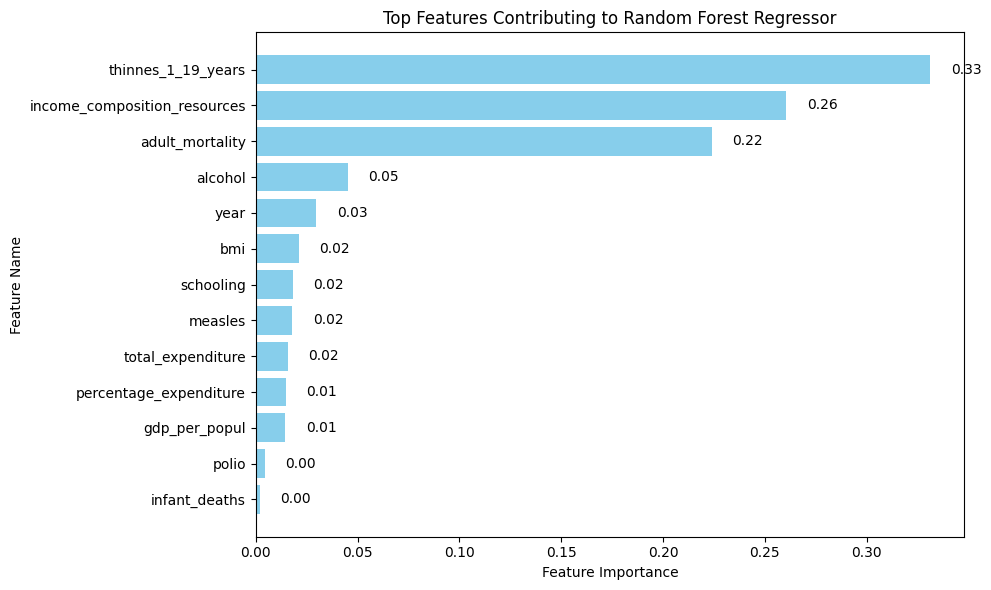

In [ ]:
# Assuming you have feature importances and feature names stored in variables
feature_names = model_scikit.feature_names_in_
feature_importances = model_scikit.feature_importances_ # List of importance values


# Create a DataFrame for clearer visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance in descending order
importance_df_sorted = importance_df.sort_values(by='importance', ascending=False)

# Separate top N features for highlighting
top_features = importance_df_sorted[:]['feature'].tolist()
top_importances = importance_df_sorted[:]['importance'].tolist()

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top Features Contributing to Random Forest Regressor')

# Annotate top features with their importance values
for i, (feature, importance) in enumerate(zip(top_features, top_importances)):
    plt.text(importance + 0.01, i, f'{importance:.2f}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Display most important features on top
plt.tight_layout()
plt.show()

- The most important features are: 'thinnes_1_19_years', 'income_composition_resources', 'adult_mortality','alcohol' and 'year' (other features have contributions lower than 0.03)

### XAI

- In order to get valuable insights from the model's predictions, **SHAP** analysis will be used.

In [ ]:
# Using a TreeExplainer for the RF model.
explainer = shap.TreeExplainer(model_scikit)
# Calculate SHAP values for the test set (or specific data you want to explain)
shap_values = explainer(X_test_ml)  # Or explainer(X_train) for training data

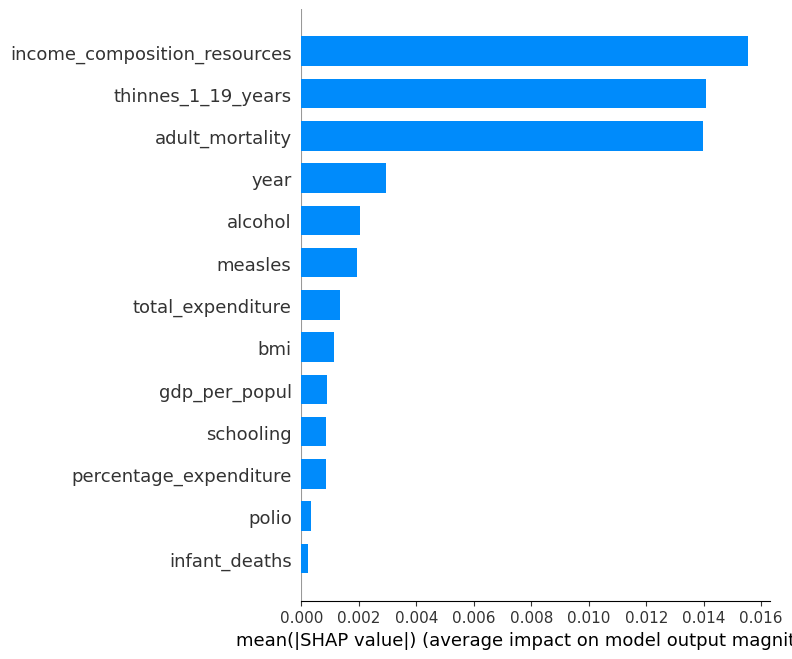

In [ ]:
# plotting a feature's importance plot
shap.summary_plot(shap_values, X_test_ml, plot_type="bar")

- From the plot above, we see that the most relevant features are: 'income_composition_resources', 'thinnes_1_19_years', 'adult_mortality','alcohol', 'year', 'total_expenditure', and the remainder features a lower contribution to the outcome.

#### Bee-swarm and Violin Plots

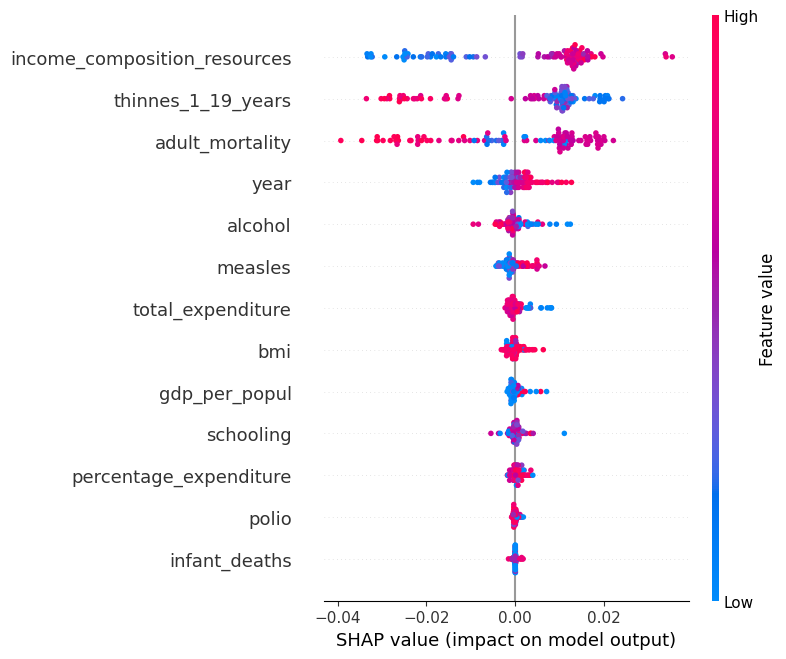

In [ ]:
# Bee-swarm plot of shap_values in the Test Set
shap.summary_plot(shap_values, X_test_ml)

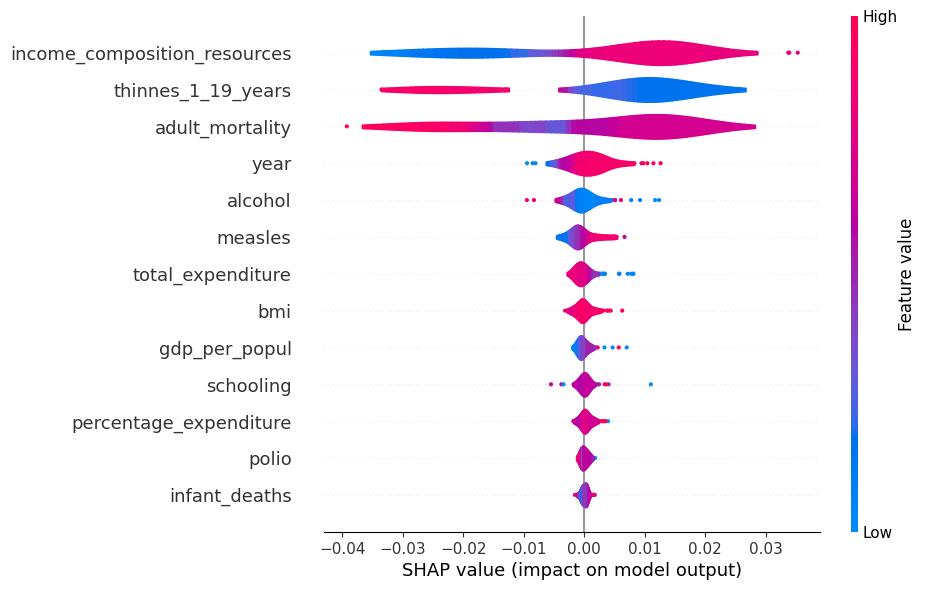

In [ ]:
# Violin plot of shap_values in the Test Set
shap.plots.violin(
    shap_values, feature_names=X_test_ml.columns)

- From the above plots, we can notice that:
1. high values of 'income_composition_resources' contribute to high values of life expectancy, while low values of 'income_composition_resources'to low values of life expeactancy;
2. low values of 'thinness_1_19_years' contribute to high values of life expectancy, while high values of 'thinness_1_19_years' to low values of life expeactancy;
3. Adult mortality has not a clear pattern;
4. high values of 'year' contribute to high values of life expectancy, while low values of 'year' to low values of life expeactancy;
5. low values of 'alcohol' contribute to high values of life expectancy, while high values of 'alcohol' to low values of life expeactancy;
6. Remaining features are harder or not possible to interpret.


- Let us create a heatmap out of the **SHAP** values.

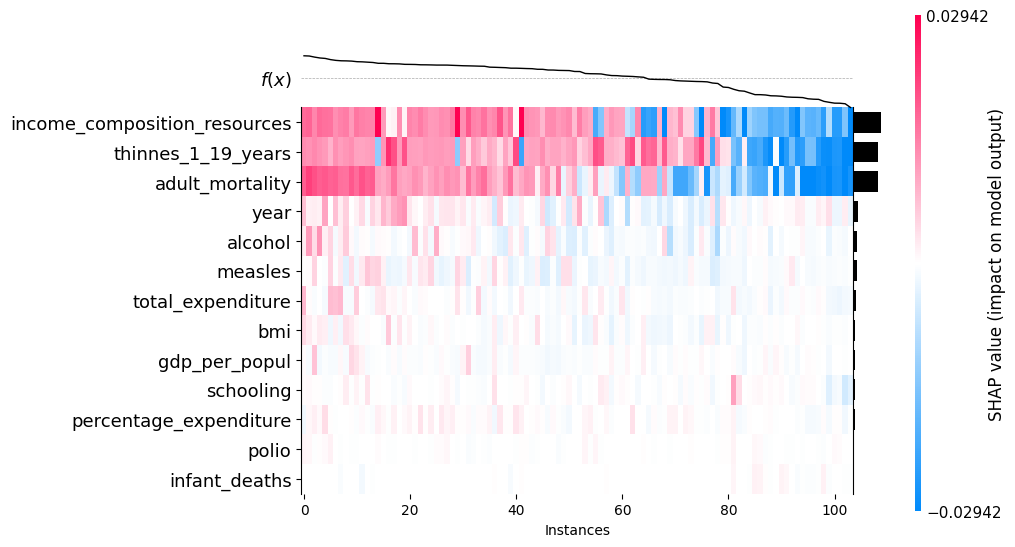

In [ ]:
# Create the aggregated plot with feature names
shap.plots.heatmap(shap_values,max_display=X_test_ml.shape[1], instance_order=shap_values.sum(1))

- From the heatmap above, we notice that:
1. 'income_composition_resources' has a trend to contribute to higher values of life expectancy in the first about 2/3 instances, while for the others to lower the life expectancy;
2. 'thinnes_1_19_years' has a trend to contribute to higher values of life expectancy in the first about 2/3 instances, while for the others to lower the life expectancy;
3. 'adult_mortality' has a trend to contribute to higher values of life expectancy in the first about 1/2 instances, while for the others to lower the life expectancy;
4. Other features have no clear pattern or a very low contribution to the instances.

